<center>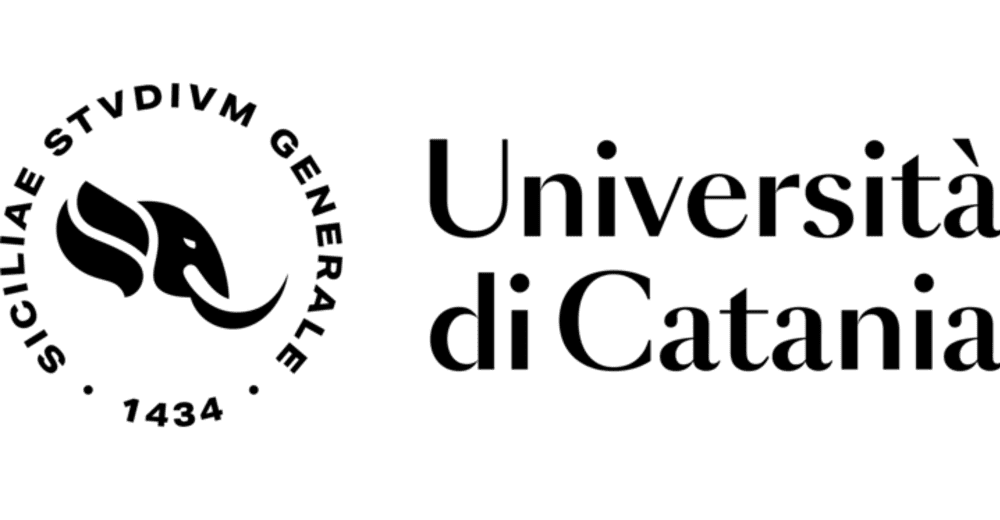

<center><h3>DATA SCIENCE FOR MANAGEMENT - LM 91</h3>
<h1>Analysis of Wine Quality Dataset</h1>

# 1. Introduction
## 1.1 Introduction
Once viewed as a luxury good, nowadays wine is increasingly enjoyed by a wider range of consumers. Portugal is a top ten wine exporting country, with 3.17% of the market share in 2005. 

Advances in information technologies have made it possible to collect, store and process massive, often highly complex datasets.

The following analysis is applied on the dataset provided by P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis, featured on the article "Modeling wine preferences by data mining from physicochemical properties" in Decision Support Systems, Elsevier, 47(4) pag. 547-553, 2009, where support vector machines and neural networks are applied in the context of ordinal regression. 

The study considered vinho verde, a unique product from the Minho (northwest) region of Portugal. Medium in alcohol, is it particularly appreciated due to its freshness (specially in the summer). The data were collected from May of 2004 to February of 2007 by a computerized system (iLab), which automatically manages the process of wine sample testing from producer requests to laboratory and sensory analysis. Each entry denotes the physicochemical characteristics and the final database was exported into a .csv file.

Since the red and white tastes are quite different, the analysis has been performed separately, thus two datasets were built with 1599 red and 4898 white examples.

Regarding the preferences, each sample was evaluated by a minimum of three sensory assessors (using blind tastes), which graded the wine in a scale that ranges from 0 (very bad) to 10 (excellent). The final sensory score is given by the median of these evaluations.

The analysis is divided into four main chapters: this first introductory chapter which describes the required steps to replicate the analysis and the dataset structure; in the second chapter we will analyze each variable of the dataset; in the third chapter the application of the supervised learning methods (Decision Tree, Extra Tree, Random Forest, Bayesian Classification, K-Nearest Neighbors, Radius Neighbors, Support Vector Machine and Logistic Regression) with comparison between methods using accuracy metric and computation of the confusion matrix; in the fourth chapter we perform unsupervised learning methods (K-Means, Mini Batch K-Means, DBSCAN and Hierarchical Agglomerative Clustering) with comparison between methods using accuracy metric and computation of the confusion matrix.

## 1.2 Required libraries
The libraries of the software application Python used in the analysis are:

In [1]:
import time
import os # To find the working directory
import pandas as pd # To create dataframe
import numpy as np 
import seaborn as sns # To plot
import matplotlib.pyplot as plt # To plot
from sklearn.model_selection import train_test_split # To split the dataset into training and test set
from scipy.stats import mode
from sklearn.metrics import accuracy_score

# For Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# For Extra Tree
from sklearn.tree import ExtraTreeClassifier

# For Random Forest
from sklearn.ensemble import RandomForestClassifier

# For Gaussian Classification
from sklearn.naive_bayes import GaussianNB

# For K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# For Radius Neighbors
from sklearn.neighbors import RadiusNeighborsClassifier

# For Support Vector Machine
from sklearn.svm import LinearSVC, SVC

# For Logistic Regression
from sklearn.linear_model import LogisticRegression

# For confusion matrix
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# For K-Means
from sklearn.cluster import KMeans

# For Mini Batch K-Means
from sklearn.cluster import MiniBatchKMeans

# For DBSCAN
from sklearn.cluster import DBSCAN

# For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score

# Set the seed for random state
seed = 1231

## 1.3 Loading dataset and preview
First we need to import the dataset, it is a .csv file that can be downloaded from UCI Machine Learning:

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
data_file_path = os.path.join(os.path.abspath(os.getcwd()), "winequality-red.csv")
data = pd.read_csv(data_file_path, sep = ";", header=0)
data.head()

--2022-11-20 19:11:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.02s   

2022-11-20 19:11:38 (4.92 MB/s) - ‘winequality-red.csv’ saved [84199/84199]



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The dataset contains:
* 1599 observations (no null values)
* 11 features (that are float numbers)
    - fixed acidity
    - volatile acidity
    - citric acid
    - residual sugar
    - chlorides
    - free sulfur dioxide
    - total sulfur dioxide
    - density
    - pH
    - sulphates
    - alcohol
* The target variable *quality* that is an integer value has the following distribution of observations per class:
    - 10 wines of quality 3
    - 53 wines of quality 4
    - 681 wines of quality 5
    - 638 wines of quality 6
    - 199 wines of quality 7
    - 18 wines of quality 8

In [ ]:
print(data.info(),"\n***\n", data.groupby('quality').size())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None 
***
 quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


# 2. Descriptive analysis

In this section we describe using summary statistics and plots each variable trying to understand the underlying distribution and the relation with the target variable.

To simplify the analysis and avoid code repetition for numeric features we created a function that will produce three plots (density plot and related boxplot, density plot and related boxplot per quality) and statistics.

In [ ]:
def univariate(variable):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(16,12))
    sns.kdeplot(data[variable], shade = True, ax=ax1)
    sns.kdeplot(data[variable], hue = data['quality'], ax=ax2)
    sns.boxplot(x=data[variable], orient="h", ax=ax3)
    sns.boxplot(x=data[variable], y=data['quality'], orient="h", order=range(8,2,-1), ax=ax4)
    
    bivariate_stat = {'Statistics':pd.Series(['Count','Mean','Std','Min','25%','50%','75%','Max','Skewness','Kurtosis']),
   'Total':pd.Series([data[variable].count(), data[variable].mean(), data[variable].std(),data[variable].min(),data[variable].quantile(0.25),data[variable].quantile(0.5),data[variable].quantile(0.75),data[variable].max(), data[variable].skew(),data[variable].kurtosis()]),
   'Quality 3':pd.Series([data[data['quality'] == 3][variable].count(),data[data['quality'] == 3][variable].mean(),data[data['quality'] == 3][variable].std(), data[data['quality'] == 3][variable].min(), data[data['quality'] == 3][variable].quantile(0.25), data[data['quality'] == 3][variable].quantile(0.5), data[data['quality'] == 3][variable].quantile(0.75), data[data['quality'] == 3][variable].max(), data[data['quality'] == 3][variable].skew(), data[data['quality'] == 3][variable].kurtosis()]),
    'Quality 4':pd.Series([data[data['quality'] == 4][variable].count(),data[data['quality'] == 4][variable].mean(),data[data['quality'] == 4][variable].std(), data[data['quality'] == 4][variable].min(), data[data['quality'] == 4][variable].quantile(0.25), data[data['quality'] == 4][variable].quantile(0.5), data[data['quality'] == 4][variable].quantile(0.75), data[data['quality'] == 4][variable].max(), data[data['quality'] == 4][variable].skew(), data[data['quality'] == 4][variable].kurtosis()]),
    'Quality 5':pd.Series([data[data['quality'] == 5][variable].count(),data[data['quality'] == 5][variable].mean(),data[data['quality'] == 5][variable].std(), data[data['quality'] == 5][variable].min(), data[data['quality'] == 5][variable].quantile(0.25), data[data['quality'] == 5][variable].quantile(0.5), data[data['quality'] == 5][variable].quantile(0.75), data[data['quality'] == 5][variable].max(), data[data['quality'] == 5][variable].skew(), data[data['quality'] == 5][variable].kurtosis()]),
    'Quality 6':pd.Series([data[data['quality'] == 6][variable].count(),data[data['quality'] == 6][variable].mean(),data[data['quality'] == 6][variable].std(), data[data['quality'] == 6][variable].min(), data[data['quality'] == 6][variable].quantile(0.25), data[data['quality'] == 6][variable].quantile(0.5), data[data['quality'] == 6][variable].quantile(0.75), data[data['quality'] == 6][variable].max(), data[data['quality'] == 6][variable].skew(), data[data['quality'] == 6][variable].kurtosis()]),
    'Quality 7':pd.Series([data[data['quality'] == 7][variable].count(),data[data['quality'] == 7][variable].mean(),data[data['quality'] == 7][variable].std(), data[data['quality'] == 7][variable].min(), data[data['quality'] == 7][variable].quantile(0.25), data[data['quality'] == 7][variable].quantile(0.5), data[data['quality'] == 7][variable].quantile(0.75), data[data['quality'] == 7][variable].max(), data[data['quality'] == 7][variable].skew(), data[data['quality'] == 7][variable].kurtosis()]),
    'Quality 8':pd.Series([data[data['quality'] == 8][variable].count(),data[data['quality'] == 8][variable].mean(),data[data['quality'] == 8][variable].std(), data[data['quality'] == 8][variable].min(), data[data['quality'] == 8][variable].quantile(0.25), data[data['quality'] == 8][variable].quantile(0.5), data[data['quality'] == 8][variable].quantile(0.75), data[data['quality'] == 8][variable].max(), data[data['quality'] == 8][variable].skew(), data[data['quality'] == 8][variable].kurtosis()])
    }
    
    return (pd.DataFrame(bivariate_stat).round(2))

## 2.1 Fixed acidity
Tartaric acid is, from a winemaking perspective, the most important acid in wine due to the prominent role it plays in maintaining the chemical stability of the wine and its color and finally in influencing the taste of the finished wine. In the dataset it is called *fixed acidity* and measuread as g(tartaric acid)/dm<sup>3</sup>.

Assumes values from 4.60 to 15.90, mean 8.32, median 7.90 and standard deviation 1.74.

As we can see from the distribution it does not follow the shape of a normal distribution, it is right skewed and leptokurtic.

Instead in the boxplot we can see that low quality wines have a more concentrated and lower fixed acidity rather than high quality wines.

,Statistics,Total,Quality 3,Quality 4,Quality 5,Quality 6,Quality 7,Quality 8
0,Count,1599.00,10.00,53.00,681.00,638.00,199.00,18.00
1,Mean,8.32,8.36,7.78,8.17,8.35,8.87,8.57
2,Std,1.74,1.77,1.63,1.56,1.80,1.99,2.12
3,Min,4.60,6.70,4.60,5.00,4.70,4.90,5.00
4,25%,7.10,7.15,6.80,7.10,7.00,7.40,7.25
5,50%,7.90,7.50,7.50,7.80,7.90,8.80,8.25
6,75%,9.20,9.88,8.40,8.90,9.40,10.10,10.23
7,Max,15.90,11.60,12.50,15.90,14.30,15.60,12.60
8,Skewness,0.98,0.95,0.92,1.38,0.83,0.51,0.04
9,Kurtosis,1.13,-0.71,1.19,3.12,0.22,0.48,-0.65


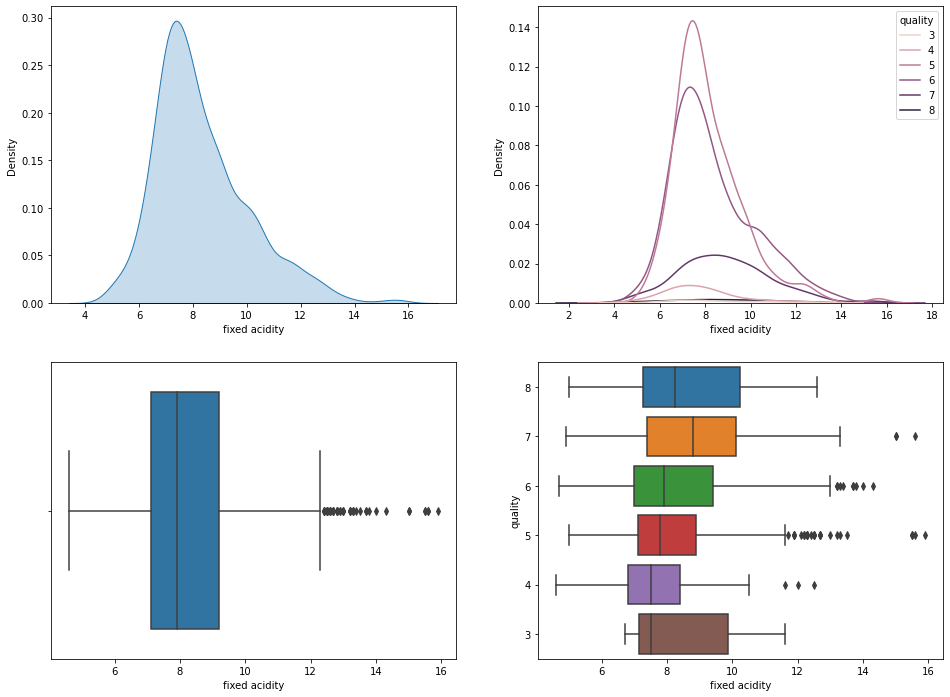

In [ ]:
univariate('fixed acidity')

## 2.2 Volatile acidity
Acetic acid in wine, often referred to as volatile acidity (VA) or vinegar taint, can be contributed by many wine spoilage yeasts and bacteria.
In the dataset is called *volatile acidity* and is measured as g(acetic acid)/dm<sup>3</sup>.

Assumes values from 0.12 to 1.58, mean 0.53, median 0.52 and standard deviation 0.18.

As we can see from the distribution it does not follow the shape of a normal distribution, it is right skewed and leptokurtic.

Instead in the boxplot we can see that low quality wines have an high concentration of acetic acid, high quality wines on the contrary have a low quantity of acetic acid below 0.60.

,Statistics,Total,Quality 3,Quality 4,Quality 5,Quality 6,Quality 7,Quality 8
0,Count,1599.00,10.00,53.00,681.00,638.00,199.00,18.00
1,Mean,0.53,0.88,0.69,0.58,0.50,0.40,0.42
2,Std,0.18,0.33,0.22,0.16,0.16,0.15,0.14
3,Min,0.12,0.44,0.23,0.18,0.16,0.12,0.26
4,25%,0.39,0.65,0.53,0.46,0.38,0.30,0.34
5,50%,0.52,0.84,0.67,0.58,0.49,0.37,0.37
6,75%,0.64,1.01,0.87,0.67,0.60,0.48,0.47
7,Max,1.58,1.58,1.13,1.33,1.04,0.92,0.85
8,Skewness,0.67,0.87,0.16,0.59,0.43,0.96,1.72
9,Kurtosis,1.23,1.03,-0.68,1.40,0.11,0.85,3.36


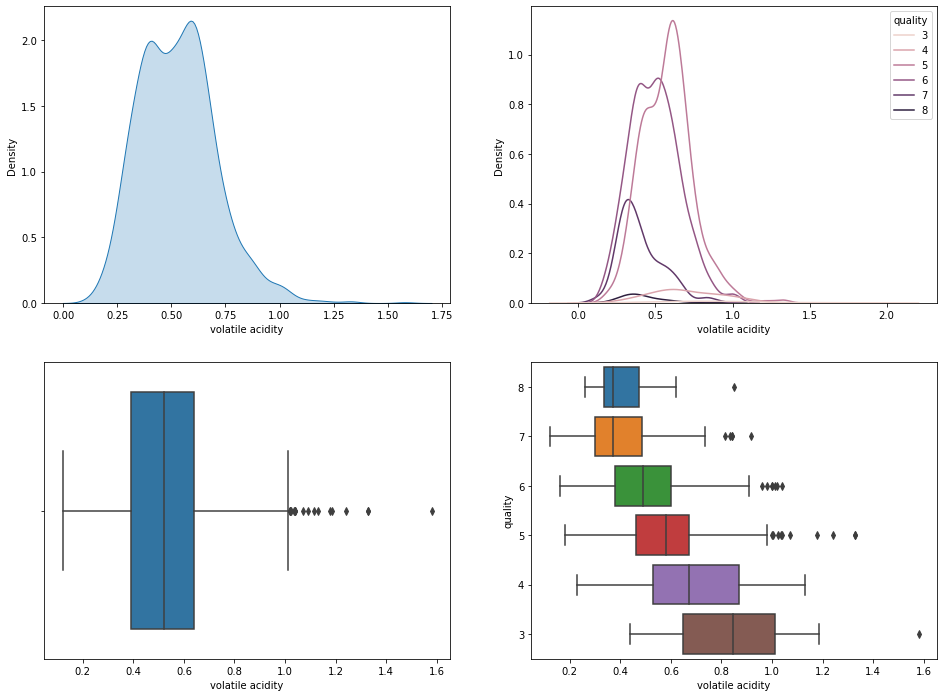

In [ ]:
univariate('volatile acidity')

## 2.3 Citric acid
Citric Acid is one of three primary acids found in grapes and converted by the winemaking process. Grapes naturally have 0.1 to 0.7 grams per liter of citric acid, which is about 10% of all acids. Though it is a minor naturally occurring acid, it plays a significant role in winemaking.
In the dataset it is measuread as g/dm<sup>3</sup>.

Assumes values from 0 to 1, mean 0.27, median 0.26 and standard deviation 0.19.

As we can see its distribution  does not follow the shape of a normal distribution, it is right skewed and platykurtic.

Instead in the boxplot we can see that low quality wines have a low concentration of citric acid, high quality wines on the contrary have an high concentration of citric acid over 0.5.

,Statistics,Total,Quality 3,Quality 4,Quality 5,Quality 6,Quality 7,Quality 8
0,Count,1599.00,10.00,53.00,681.00,638.00,199.00,18.00
1,Mean,0.27,0.17,0.17,0.24,0.27,0.38,0.39
2,Std,0.19,0.25,0.20,0.18,0.20,0.19,0.20
3,Min,0.00,0.00,0.00,0.00,0.00,0.00,0.03
4,25%,0.09,0.00,0.03,0.09,0.09,0.30,0.30
5,50%,0.26,0.04,0.09,0.23,0.26,0.40,0.42
6,75%,0.42,0.33,0.27,0.36,0.43,0.49,0.53
7,Max,1.00,0.66,1.00,0.79,0.78,0.76,0.72
8,Skewness,0.32,1.23,1.72,0.52,0.22,-0.38,-0.39
9,Kurtosis,-0.79,-0.17,4.07,-0.50,-0.98,-0.41,-0.47


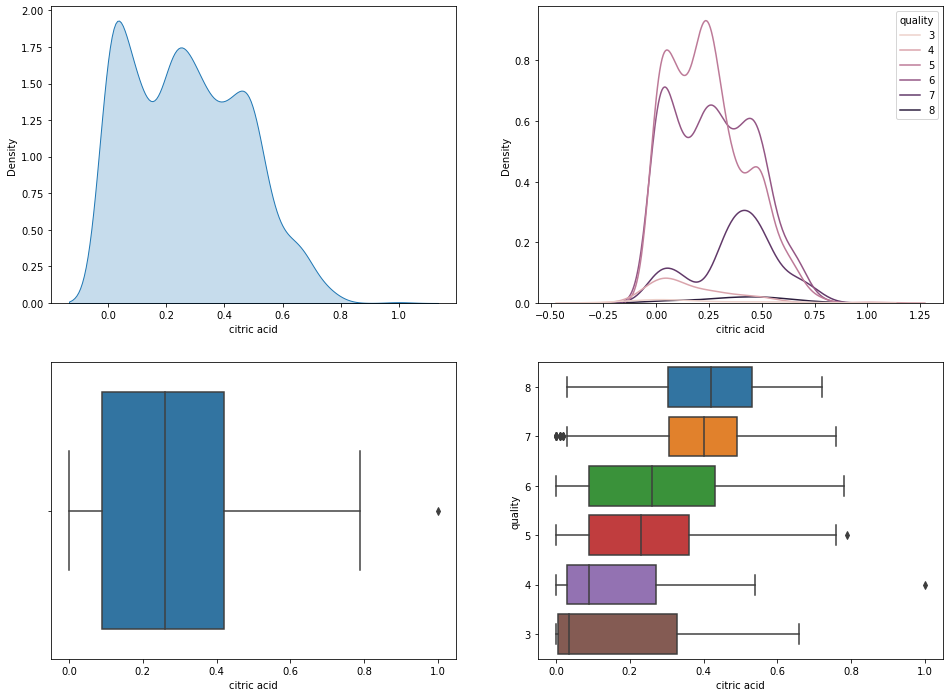

In [ ]:
univariate('citric acid')

## 2.4 Residual sugar
Among the components influencing how sweet a wine will taste is residual sugar.
It is measured as g/dm<sup>3</sup>.

Assumes values from 0.90 to 15.50, mean 2.54, median 2.20 and standard deviation 1.41.

As we can see from the distribution it is right skewed and leptokurtic.

Instead in the boxplot we cannot define an easy metric to understand the quality of wines because values are similar, the only problem in this case is that wines with quality between 5 and 7 have many outliers.

,Statistics,Total,Quality 3,Quality 4,Quality 5,Quality 6,Quality 7,Quality 8
0,Count,1599.00,10.00,53.00,681.00,638.00,199.00,18.00
1,Mean,2.54,2.64,2.69,2.53,2.48,2.72,2.58
2,Std,1.41,1.40,1.79,1.36,1.44,1.37,1.30
3,Min,0.90,1.20,1.30,1.20,0.90,1.20,1.40
4,25%,1.90,1.88,1.90,1.90,1.90,2.00,1.80
5,50%,2.20,2.10,2.10,2.20,2.20,2.30,2.10
6,75%,2.60,3.10,2.80,2.60,2.50,2.75,2.60
7,Max,15.50,5.70,12.90,15.50,15.40,8.90,6.40
8,Skewness,4.54,1.41,3.96,4.40,5.49,2.22,2.13
9,Kurtosis,28.62,1.43,20.30,28.30,37.72,4.98,4.32


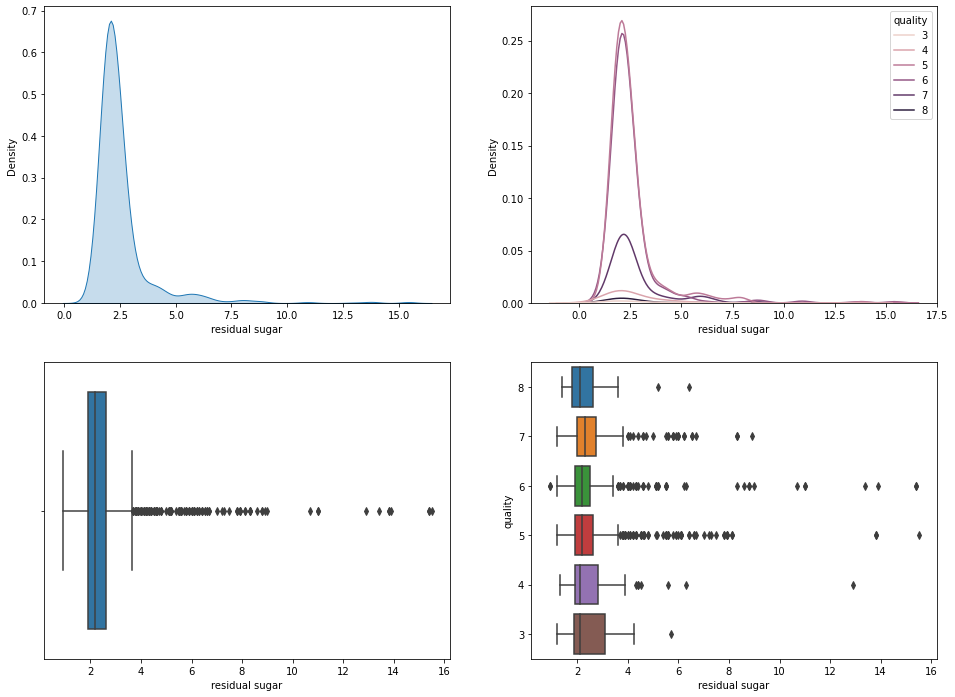

In [ ]:
univariate('residual sugar')

## 2.5 Chlorides
Red wines from different countries have been assessed in order to determine the influence of terroir and grape variety in their concentration of chloride. In the dataset it is measured as g(sodium chloride)/dm<sup>3</sup>.

Assumes values from 0.01 to 0.61, mean 0.09, median 0.08 and standard deviation 0.05.

As we can see its distribution does not follow the shape of a normal distribution, it is right skewed and leptokurtic.

Instead in the boxplot we can see that low quality wines have an high concentration of chlorides while high quality wines a lower concentration.

,Statistics,Total,Quality 3,Quality 4,Quality 5,Quality 6,Quality 7,Quality 8
0,Count,1599.00,10.00,53.00,681.00,638.00,199.00,18.00
1,Mean,0.09,0.12,0.09,0.09,0.08,0.08,0.07
2,Std,0.05,0.07,0.08,0.05,0.04,0.03,0.01
3,Min,0.01,0.06,0.04,0.04,0.03,0.01,0.04
4,25%,0.07,0.08,0.07,0.07,0.07,0.06,0.06
5,50%,0.08,0.09,0.08,0.08,0.08,0.07,0.07
6,75%,0.09,0.14,0.09,0.09,0.09,0.09,0.08
7,Max,0.61,0.27,0.61,0.61,0.42,0.36,0.09
8,Skewness,5.68,1.40,6.34,5.34,4.86,4.99,-0.78
9,Kurtosis,41.72,1.34,43.45,33.50,31.04,43.68,0.27


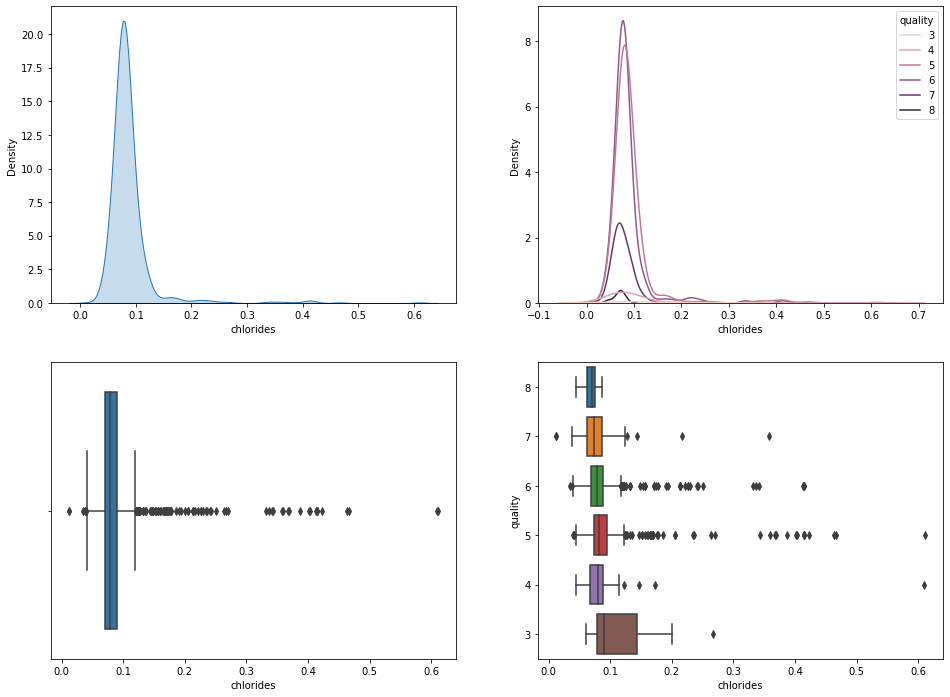

In [ ]:
univariate('chlorides')

## 2.6 Free sulfur dioxide

Sulfur dioxide is used throughout all stages of the winemaking process to prevent oxidation and microbial growth.
Excessive amounts of SO<sub>2</sub> can inhibit fermentation and cause undesirable sensory effects. Free sulfur dioxide is a measure of the amount of SO<sub>2</sub> that is not bound to other molecules and is used to calculate molecular SO<sub>2</sub>, in the dataset is measured as mg/dm<sup>3</sup>.

Assumes values from 1 to 72, mean 15.87, median 14.00 and standard deviation 10.46.

As we can see its distribution does not follow the shape of a normal distribution, it is right skewed and leptokurtic.

Instead in the boxplot we can see that low quality wines have a lower concentration of sulfur dioxide while high quality wines an higher one; also wine with quality between 5 and 7 have many outliers.

,Statistics,Total,Quality 3,Quality 4,Quality 5,Quality 6,Quality 7,Quality 8
0,Count,1599.00,10.00,53.00,681.00,638.00,199.00,18.00
1,Mean,15.87,11.00,12.26,16.98,15.71,14.05,13.28
2,Std,10.46,9.76,9.03,10.96,9.94,10.18,11.16
3,Min,1.00,3.00,3.00,3.00,1.00,3.00,3.00
4,25%,7.00,5.00,6.00,9.00,8.00,6.00,6.00
5,50%,14.00,6.00,11.00,15.00,14.00,11.00,7.50
6,75%,21.00,14.50,15.00,23.00,21.00,18.00,16.50
7,Max,72.00,34.00,41.00,68.00,72.00,54.00,42.00
8,Skewness,1.25,1.73,1.37,1.20,1.22,1.49,1.49
9,Kurtosis,2.02,2.78,1.47,1.88,2.29,2.15,1.54


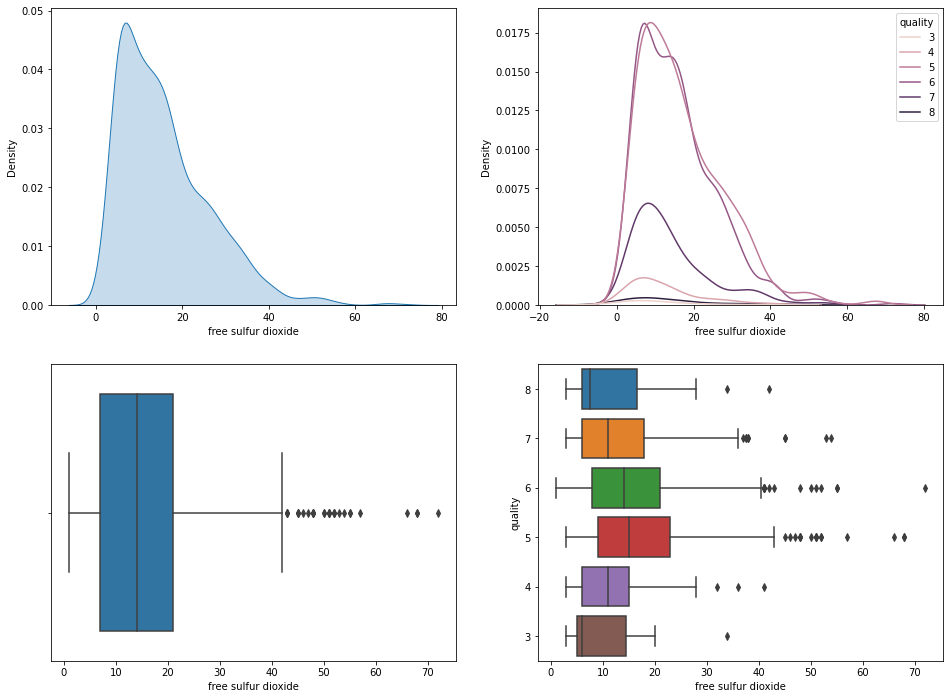

In [ ]:
univariate('free sulfur dioxide')

## 2.7 Total sulfur dioxide
Total Sulfur Dioxide (TSO<sub>2</sub>) is the portion of SO<sub>2</sub> that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars. In the dataset is measuread as mg/dm<sup>3</sup>.

Assumes values from 6 to 289, mean 46.47, median 38.00 and standard deviation 32.90.

As we can see its distribution does not follow the shape of a normal distribution, it is right skewed and leptokurtic.

Instead in the boxplot we cannot define a clear distinction between high quality and low quality wines, only for medium quality wines there is an higher concentration of total sulfur dioxide.

,Statistics,Total,Quality 3,Quality 4,Quality 5,Quality 6,Quality 7,Quality 8
0,Count,1599.00,10.00,53.00,681.00,638.00,199.00,18.00
1,Mean,46.47,24.90,36.25,56.51,40.87,35.02,33.44
2,Std,32.90,16.83,27.58,36.99,25.04,33.19,25.43
3,Min,6.00,9.00,7.00,6.00,6.00,7.00,12.00
4,25%,22.00,12.50,14.00,26.00,23.00,17.50,16.00
5,50%,38.00,15.00,26.00,47.00,35.00,27.00,21.50
6,75%,62.00,42.50,49.00,84.00,54.00,43.00,43.00
7,Max,289.00,49.00,119.00,155.00,165.00,289.00,88.00
8,Skewness,1.52,0.73,1.21,0.76,1.35,4.59,1.34
9,Kurtosis,3.81,-1.55,0.99,-0.39,2.62,30.56,0.58


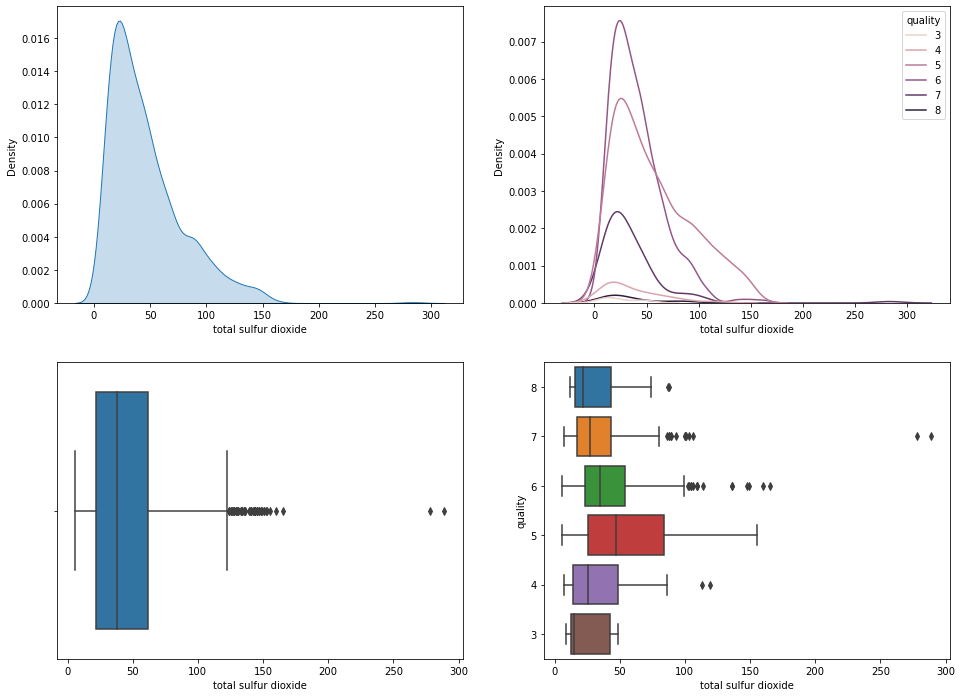

In [ ]:
univariate('total sulfur dioxide')

## 2.8 Density
The density of water is close to that of water depending on the percent alcohol and sugar content. In the dataset is measured as g/dm<sup>3</sup>.

Assumes values from 0.99 to 1, mean 1.00, median 1.00 and standard deviation is rounded at 0.

As we can see its distribution does not follow the shape of a normal distribution, it is right skewed and leptokurtic.

Instead in the boxplot we can see this value is particularly volatile, only in low quality wines the concentration is higher.

,Statistics,Total,Quality 3,Quality 4,Quality 5,Quality 6,Quality 7,Quality 8
0,Count,1599.00,10.00,53.00,681.00,638.00,199.00,18.00
1,Mean,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2,Std,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Min,0.99,0.99,0.99,0.99,0.99,0.99,0.99
4,25%,1.00,1.00,1.00,1.00,1.00,0.99,0.99
5,50%,1.00,1.00,1.00,1.00,1.00,1.00,0.99
6,75%,1.00,1.00,1.00,1.00,1.00,1.00,1.00
7,Max,1.00,1.00,1.00,1.00,1.00,1.00,1.00
8,Skewness,0.07,0.07,0.44,0.48,0.05,0.34,-0.24
9,Kurtosis,0.93,-0.82,0.55,1.39,0.72,0.42,-0.83


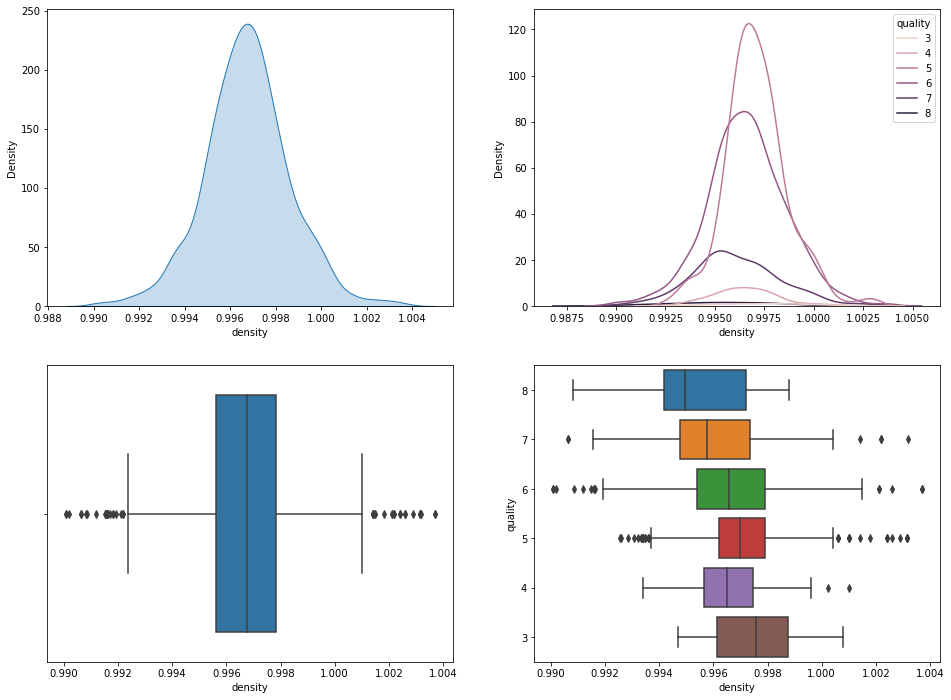

In [ ]:
univariate('density')

## 2.9 pH
pH describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic).

Assumes values from 2.74 to 4.01, mean 3.31, median 3.31 and standard deviation 0.15.

As we can see its distribution does not follow the shape of a normal distribution, it is right skewed and leptokurtic.

Instead in the boxplot we cannnot define a big difference between high and low quality wines, the median value is between 3.3 and 3.4.

,Statistics,Total,Quality 3,Quality 4,Quality 5,Quality 6,Quality 7,Quality 8
0,Count,1599.00,10.00,53.00,681.00,638.00,199.00,18.00
1,Mean,3.31,3.40,3.38,3.30,3.32,3.29,3.27
2,Std,0.15,0.14,0.18,0.15,0.15,0.15,0.20
3,Min,2.74,3.16,2.74,2.88,2.86,2.92,2.88
4,25%,3.21,3.31,3.30,3.20,3.22,3.20,3.16
5,50%,3.31,3.39,3.37,3.30,3.32,3.28,3.23
6,75%,3.40,3.50,3.50,3.40,3.41,3.38,3.35
7,Max,4.01,3.63,3.90,3.74,4.01,3.78,3.72
8,Skewness,0.19,-0.01,-0.31,0.05,0.30,0.38,0.42
9,Kurtosis,0.81,-0.60,2.94,-0.00,1.48,0.67,0.72


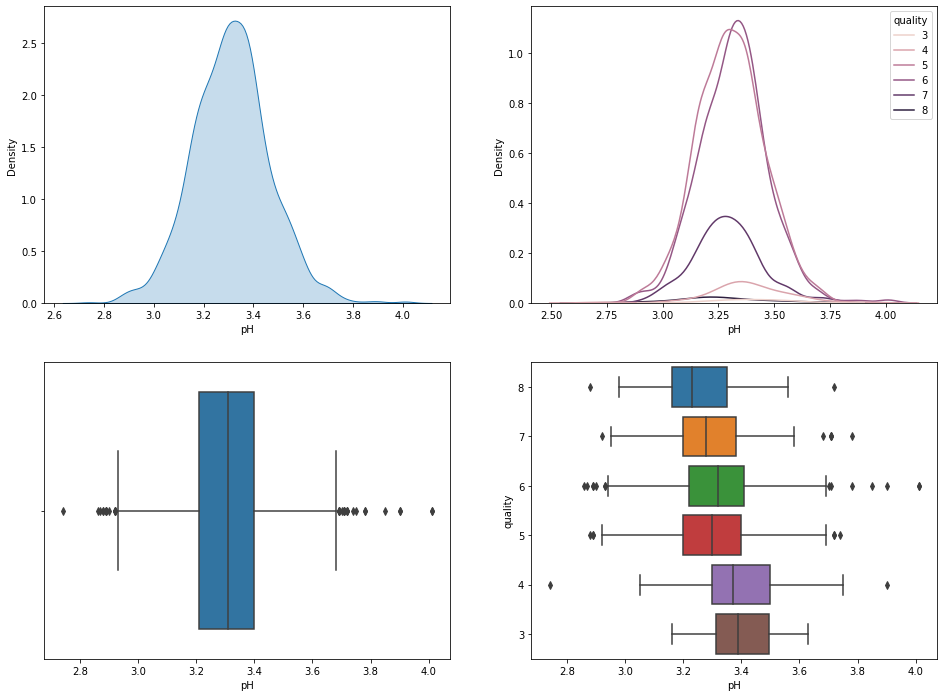

In [ ]:
univariate('pH')

## 2.10 Sulphates
Contribute to sulfur dioxide gas (SO<sub>2</sub>) levels, which acts as an antimicrobial and antioxidant. In the dataset is measured as g(potassium sulphate)/dm<sup>3</sup>.

Assumes values from 0.33 to 2.00, mean 0.66, median 0.62 and standard deviation 0.17.

As we can see its distribution does not follow the shape of a normal distribution, it is right skewed and leptokurtic.

Instead in the boxplot we can see that low quality wines have a lower concentration of sulphates while high quality wines an higher concentration; also wines with quality 5 and 6 have many outliers.

,Statistics,Total,Quality 3,Quality 4,Quality 5,Quality 6,Quality 7,Quality 8
0,Count,1599.00,10.00,53.00,681.00,638.00,199.00,18.00
1,Mean,0.66,0.57,0.60,0.62,0.68,0.74,0.77
2,Std,0.17,0.12,0.24,0.17,0.16,0.14,0.12
3,Min,0.33,0.40,0.33,0.37,0.40,0.39,0.63
4,25%,0.55,0.51,0.49,0.53,0.58,0.65,0.69
5,50%,0.62,0.55,0.56,0.58,0.64,0.74,0.74
6,75%,0.73,0.62,0.60,0.66,0.75,0.83,0.82
7,Max,2.00,0.86,2.00,1.98,1.95,1.36,1.10
8,Skewness,2.43,1.45,4.34,2.82,2.72,0.61,1.46
9,Kurtosis,11.72,3.53,23.29,12.18,15.32,2.07,2.87


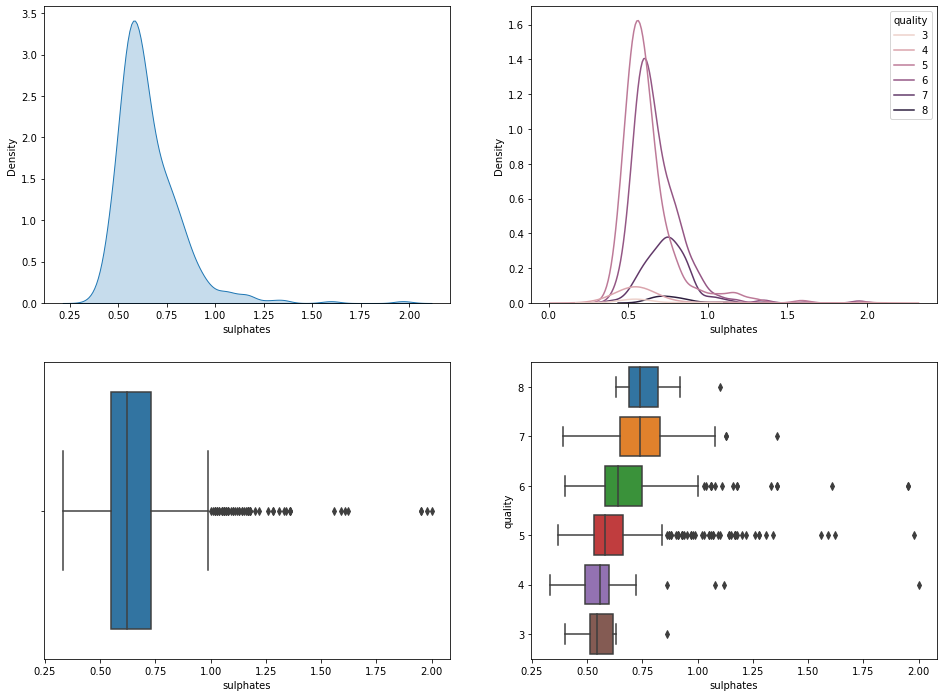

In [ ]:
univariate('sulphates')

## 2.11 Alcohol
*Alcohol* defines the percentage of alcohol content in the wine, measured as (vol.%).

Assumes values from 8.40 to 14.90, mean 10.42, median 10.20 and standard deviation 1.07.

As we can see its distribution does not follow the shape of a normal distribution, it is right skewed and leptokurtic.

Instead in the boxplot we can see that low quality wines have a lower concentration of alcohol while high quality wines an higher one; also wines with quality 5 have many outliers.

,Statistics,Total,Quality 3,Quality 4,Quality 5,Quality 6,Quality 7,Quality 8
0,Count,1599.00,10.00,53.00,681.00,638.00,199.00,18.00
1,Mean,10.42,9.96,10.27,9.90,10.63,11.47,12.09
2,Std,1.07,0.82,0.93,0.74,1.05,0.96,1.22
3,Min,8.40,8.40,9.00,8.50,8.40,9.20,9.80
4,25%,9.50,9.72,9.60,9.40,9.80,10.80,11.32
5,50%,10.20,9.93,10.00,9.70,10.50,11.50,12.15
6,75%,11.10,10.58,11.00,10.20,11.30,12.10,12.88
7,Max,14.90,11.00,13.10,14.90,14.00,14.00,14.00
8,Skewness,0.86,-0.57,0.65,1.84,0.55,0.01,-0.23
9,Kurtosis,0.20,0.04,-0.01,5.33,-0.14,-0.42,-0.56


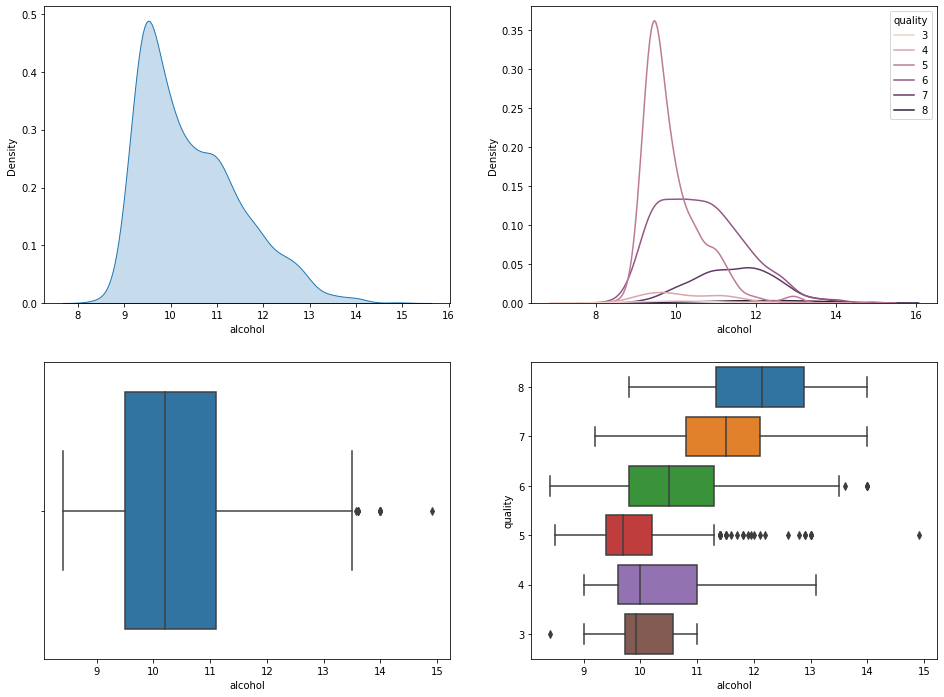

In [ ]:
univariate('alcohol')

## 2.12 Quality
*Quality* is the target variable of the classification task, with possible values between 0 (very bad) and 10 (excellent). As can be easily seen from the barplot, the actual values observed in this dataset range between 3 and 8, with mode equal to 5.

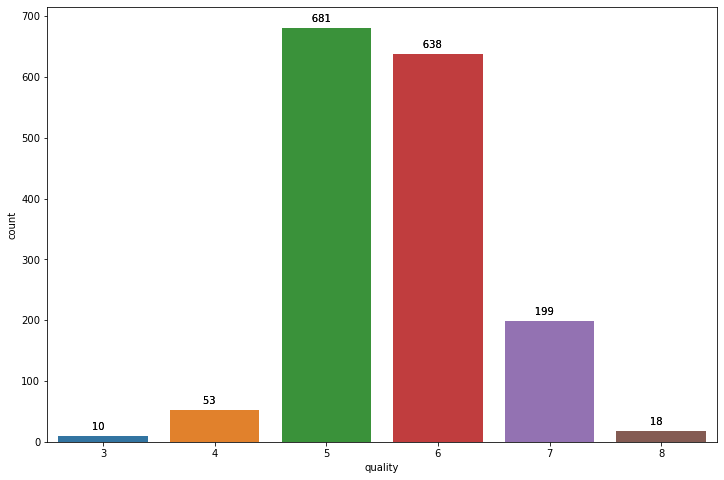

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='quality', data=data)
ax = sns.countplot(x='quality', data=data)
for p in ax.patches: ax.annotate('{:9.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

## 2.13 Plotting correlations
We can also plot the correlation between all pairs of features. Looking at the lightly-coloured cells in the plot, we can discover features that are correlated.

The target variable quality is positively correlated to alcohol (0.48) on average, positively correlated to sulphates (0.25) and citric acid (0.23) and negatively correlated to volatile acidity (-0.39), all the other features have null or small correlations.

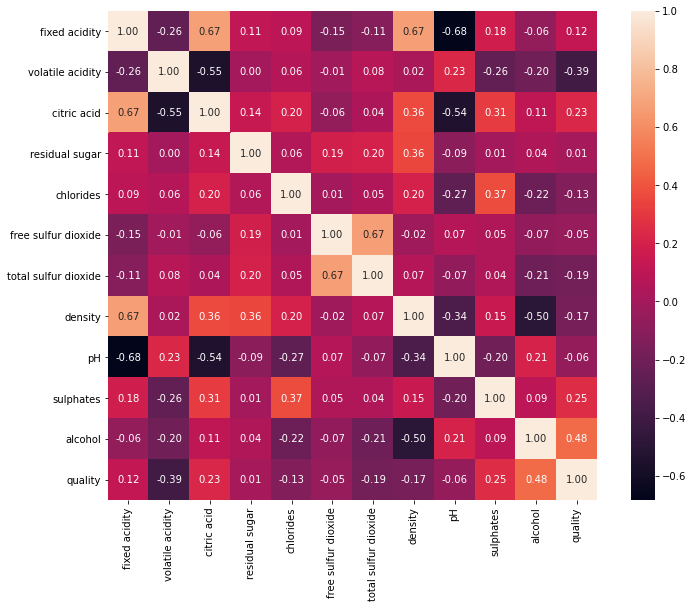

In [ ]:
f, ax = plt.subplots(figsize=(12, 9))

cols = data.columns
cm = np.corrcoef(data[cols].values.T)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)

# 3. Supervised Learning
Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples.

## 3.1 Data normalization
First of all we create the dataframe and name X as data and y as target.

In [ ]:
X = data.iloc[:,:11]
y = data.iloc[:,11]

Now, that we have a better understanding of the data, we can start preparing it for the model.
First of all we need to normalize the data, as machine learning algorithms do not perform well when different features have different scales. If we want to normalize a feature $ x $ in the $[0, 1]$ range, then we can use the following formula:

$$ x_\text{normalized} = \frac{x - x_\text{min}}{x_\text{max} - x_\text{min}} $$

In [ ]:
X_normalized = (X - X.min()) / (X.max() - X.min())

And now that the dataset is normalized, we decided to split the dataset in training set for the 80% and test set for the last 20%.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.2, random_state = seed)

At this stage we can start the classification of the data trying different methods, computing the accuracy for both training and test set and at the end compare the results between models and methods.

## 3.2 Decision Tree
*Decision Tree is a non-parametric supervised learning method, is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility*<br />
We create models varying the the maximum depth and the function to measure the quality of a split (Gini or Entropy) and how to split (best or random).

In [ ]:
criterion_list = []
splitter_list = []
dt_score_train = list()
dt_score_test = list()
max_depth = list()

for i in range(1,11):
    for criterion in ['gini', 'entropy']:
        for splitter in ['best', 'random']:
            dt = DecisionTreeClassifier(max_depth = i, criterion = criterion, splitter = splitter, random_state = seed)
            dt.fit(X_train, y_train)
            max_depth.append(i)
            criterion_list.append(criterion)
            splitter_list.append(splitter)
            dt_score_train.append(dt.score(X_train, y_train))
            dt_score_test.append(dt.score(X_test, y_test))

dt_score = { "Max depth": max_depth, "Criterion": criterion_list, "Splitter": splitter_list, "Score Training": dt_score_train, "Score Test": dt_score_test}
df_dt_score = pd.DataFrame(dt_score)
df_dt_score.head()

,Max depth,Criterion,Splitter,Score Training,Score Test
0,1,gini,best,0.567631,0.534375
1,1,gini,random,0.562940,0.515625
2,1,entropy,best,0.555121,0.546875
3,1,entropy,random,0.562940,0.515625
4,2,gini,best,0.567631,0.534375


And the best model is:

In [ ]:
df_dt_score.loc[[df_dt_score["Score Test"].idxmax()]]

,Max depth,Criterion,Splitter,Score Training,Score Test
36,10,gini,best,0.891321,0.603125


In [ ]:
dt_model_best = DecisionTreeClassifier(max_depth = 10, criterion = 'gini', splitter = 'best', random_state = seed).fit(X_train, y_train)

# The tree plot is an image at high resolution, it will take time and computational power to plot it
#plt.figure(figsize=[400,400], dpi = 72)
#a = plot_tree(dt_model_best, feature_names = list(data.columns), class_names = ['3','4','5','6','7','8'], filled=True, rounded = True, fontsize = 14)
#plt.show(a)

We can also plot the accuracy of the models versus the maximum depth used:

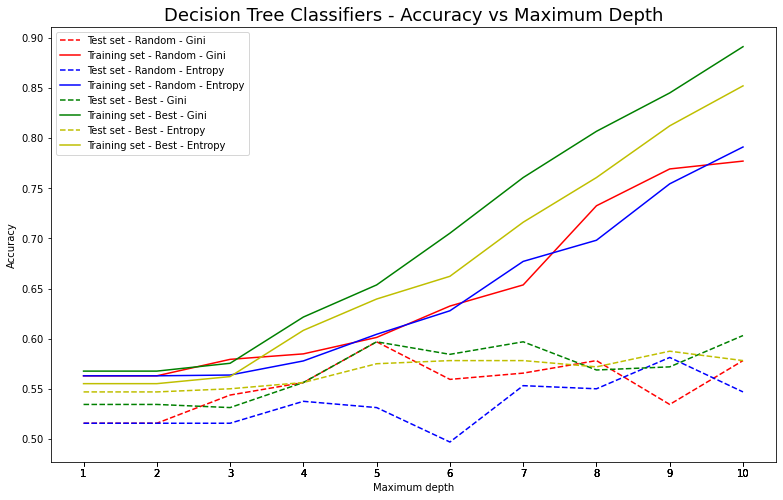

In [ ]:
df_dt_score1 = df_dt_score[(df_dt_score['Splitter'].str.match('random'))&(df_dt_score['Criterion'].str.match('gini'))]
df_dt_score2 = df_dt_score[(df_dt_score['Splitter'].str.match('random'))&(df_dt_score['Criterion'].str.match('entropy'))]
df_dt_score3 = df_dt_score[(df_dt_score['Splitter'].str.match('best'))&(df_dt_score['Criterion'].str.match('gini'))]
df_dt_score4 = df_dt_score[(df_dt_score['Splitter'].str.match('best'))&(df_dt_score['Criterion'].str.match('entropy'))]

plt.figure(figsize=[13, 8])
plt.plot(np.arange(1,11), df_dt_score1["Score Test"], "--r", label = "Test set - Random - Gini")
plt.plot(np.arange(1,11), df_dt_score1["Score Training"], "-r", label = "Training set - Random - Gini")

plt.plot(np.arange(1,11), df_dt_score2["Score Test"], "--b", label = "Test set - Random - Entropy")
plt.plot(np.arange(1,11), df_dt_score2["Score Training"], "-b", label = "Training set - Random - Entropy")

plt.plot(np.arange(1,11), df_dt_score3["Score Test"], "--g", label = "Test set - Best - Gini")
plt.plot(np.arange(1,11), df_dt_score3["Score Training"], "-g", label = "Training set - Best - Gini")

plt.plot(np.arange(1,11), df_dt_score4["Score Test"], "--y", label = "Test set - Best - Entropy")
plt.plot(np.arange(1,11), df_dt_score4["Score Training"], "-y", label = "Training set - Best - Entropy")

plt.legend(loc = "best")
plt.title("Decision Tree Classifiers - Accuracy vs Maximum Depth", fontsize = 18)
plt.xlabel("Maximum depth")
plt.ylabel("Accuracy")
plt.xticks(max_depth)
plt.show()

## 3.3 Extra Tree
Is an extremely randomized tree classifier.
Extra-trees differ from classic decision trees in the way they are built. When looking for the best split to separate the samples of a node into two groups, random splits are drawn for each of the max_features randomly selected features and the best split among those is chosen.

In [ ]:
criterion_list = []
splitter_list = []
et_score_train = list()
et_score_test = list()
max_depth = list()

for i in range(1,11):
    for criterion in ['gini', 'entropy']:
        for splitter in ['best', 'random']:
            et = ExtraTreeClassifier(max_depth = i, criterion = criterion, splitter = splitter, random_state = seed)
            et.fit(X_train, y_train)
            max_depth.append(i)
            criterion_list.append(criterion)
            splitter_list.append(splitter)
            et_score_train.append(et.score(X_train, y_train))
            et_score_test.append(et.score(X_test, y_test))

et_score = { "Max depth": max_depth, "Criterion": criterion_list, "Splitter": splitter_list, "Score Training": et_score_train, "Score Test": et_score_test}
df_et_score = pd.DataFrame(et_score)
df_et_score.head()

,Max depth,Criterion,Splitter,Score Training,Score Test
0,1,gini,best,0.567631,0.534375
1,1,gini,random,0.451916,0.487500
2,1,entropy,best,0.555121,0.546875
3,1,entropy,random,0.426896,0.400000
4,2,gini,best,0.574668,0.546875


And the best model is:

In [ ]:
df_et_score.loc[[df_et_score["Score Test"].idxmax()]]

,Max depth,Criterion,Splitter,Score Training,Score Test
20,6,gini,best,0.660672,0.609375


In [ ]:
et_model_best = ExtraTreeClassifier(max_depth = 6, criterion = 'gini', splitter = 'best', random_state = seed).fit(X_train, y_train)

We can also plot the accuracy of the models versus the maximum depth used:

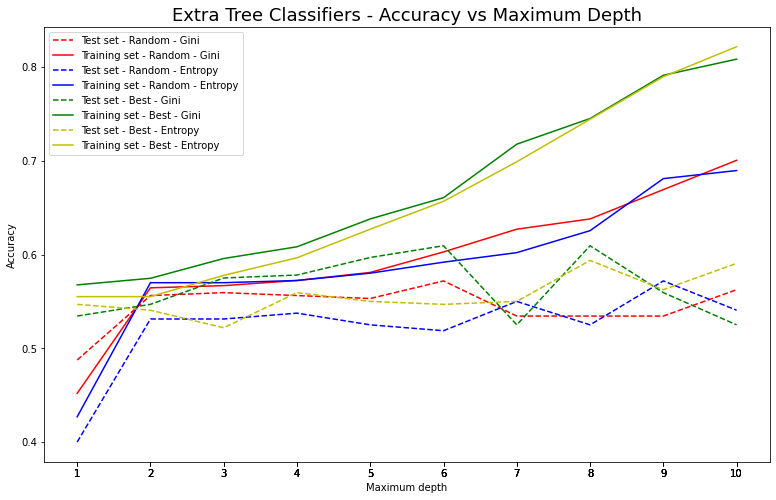

In [ ]:
df_et_score1 = df_et_score[(df_et_score['Splitter'].str.match('random'))&(df_et_score['Criterion'].str.match('gini'))]
df_et_score2 = df_et_score[(df_et_score['Splitter'].str.match('random'))&(df_et_score['Criterion'].str.match('entropy'))]
df_et_score3 = df_et_score[(df_et_score['Splitter'].str.match('best'))&(df_et_score['Criterion'].str.match('gini'))]
df_et_score4 = df_et_score[(df_et_score['Splitter'].str.match('best'))&(df_et_score['Criterion'].str.match('entropy'))]

plt.figure(figsize=[13, 8])
plt.plot(np.arange(1,11), df_et_score1["Score Test"], "--r", label = "Test set - Random - Gini")
plt.plot(np.arange(1,11), df_et_score1["Score Training"], "-r", label = "Training set - Random - Gini")

plt.plot(np.arange(1,11), df_et_score2["Score Test"], "--b", label = "Test set - Random - Entropy")
plt.plot(np.arange(1,11), df_et_score2["Score Training"], "-b", label = "Training set - Random - Entropy")

plt.plot(np.arange(1,11), df_et_score3["Score Test"], "--g", label = "Test set - Best - Gini")
plt.plot(np.arange(1,11), df_et_score3["Score Training"], "-g", label = "Training set - Best - Gini")

plt.plot(np.arange(1,11), df_et_score4["Score Test"], "--y", label = "Test set - Best - Entropy")
plt.plot(np.arange(1,11), df_et_score4["Score Training"], "-y", label = "Training set - Best - Entropy")

plt.legend(loc = "best")
plt.title("Extra Tree Classifiers - Accuracy vs Maximum Depth", fontsize = 18)
plt.xlabel("Maximum depth")
plt.ylabel("Accuracy")
plt.xticks(max_depth)
plt.show()

## 3.4 Random Forest
*Each classifier in the ensemble is a decision tree classifier and is generated using a random selection of attributes at each node to determine the split. During classification, each tree votes and the most popular class is returned.*<br />
In this case we changed the maximum depth, the criterion and the number of estimators (from 10 to 100).

In [ ]:
criterion_list = []
n_estimators_list = list()
rf_score_train = list()
rf_score_test = list()
max_depth = list()

for i in range(1,11):
    for criterion in ['gini', 'entropy']:
        for j in range(10, 100):
            rf = RandomForestClassifier(n_estimators = j, max_depth = i, criterion = criterion, random_state = seed)
            rf.fit(X_train, y_train)
            max_depth.append(i)
            criterion_list.append(criterion)
            n_estimators_list.append(j)
            rf_score_train.append(rf.score(X_train, y_train))
            rf_score_test.append(rf.score(X_test, y_test))

rf_score = { "Max depth": max_depth, "Criterion": criterion_list, "Number of estimators": n_estimators_list, "Score Training": rf_score_train, "Score Test": rf_score_test}
df_rf_score = pd.DataFrame(rf_score)
df_rf_score.head()

,Max depth,Criterion,Number of estimators,Score Training,Score Test
0,1,gini,10,0.573886,0.528125
1,1,gini,11,0.578577,0.540625
2,1,gini,12,0.573886,0.525000
3,1,gini,13,0.584832,0.550000
4,1,gini,14,0.579359,0.537500


And the best model is:

In [ ]:
df_rf_score.loc[[df_rf_score["Score Test"].idxmax()]]

,Max depth,Criterion,Number of estimators,Score Training,Score Test
1751,10,entropy,51,0.975762,0.68125


In [ ]:
rf_model_best = RandomForestClassifier(max_depth = 10, criterion = 'entropy', n_estimators = 51, random_state = seed).fit(X_train, y_train)

Considering that the number of estimators is very large, and there are 1800 models we preferred not to show the plots of the models.

## 3.5 Bayesian Classification
GaussianNB implements the Gaussian Naive Bayes algorithm for classification.

We create models varying the the priors and the variance of all features:

In [ ]:
gnb1 = GaussianNB().fit(X_train, y_train)
print("Score Training: ", gnb1.score(X_train, y_train))
gnb1.predict(X_test)
print("Score Test: ", gnb1.score(X_test, y_test))

Score Training:  0.5684128225175918
Score Test:  0.525


And we can take a look to the prior probabilites applied and create a new model modifying them:

In [ ]:
gnb1.class_prior_

array([0.00469116, 0.03440188, 0.42220485, 0.40734949, 0.12118843,
       0.01016419])

Changing the prior probabilities of the classes in [0.01, 0.04, 0.40, 0.40, 0.14, 0.01]:

In [ ]:
gnb2 = GaussianNB(priors = [0.01, 0.04, 0.40, 0.40, 0.14, 0.01]).fit(X_train, y_train)
print("Score Training: ", gnb2.score(X_train, y_train))
gnb2.predict(X_test)
print("Score Test: ", gnb2.score(X_test, y_test))

Score Training:  0.5559030492572322
Score Test:  0.515625


Estimating probabilities from small training sets is error-prone, as we can see the accuracy with new prior probabilities is lower, so we use the same prior probabilities as before and also smooth the error changing the variance of all features to 1e-1:

In [ ]:
gnb3 = GaussianNB(var_smoothing = 1e-1).fit(X_train, y_train)
print("Score Training: ", gnb3.score(X_train, y_train))
gnb3.predict(X_test)
print("Score Test: ", gnb3.score(X_test, y_test))

Score Training:  0.5832681782642689
Score Test:  0.55


And now we compare graphically the difference between models and see that the best model is the third with default priors and variance parameter modified:

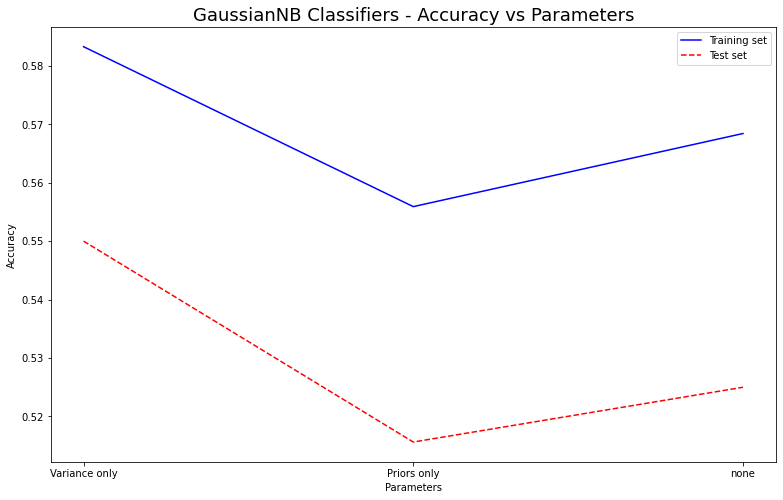

In [ ]:
accuracy_train_gnb = [gnb3.score(X_train, y_train), gnb2.score(X_train, y_train), gnb1.score(X_train, y_train)]
accuracy_test_gnb = [gnb3.score(X_test, y_test), gnb2.score(X_test, y_test), gnb1.score(X_test, y_test)]
parameters_gnb = ["Variance only","Priors only","none"]

plt.figure(figsize=[13, 8])
plt.plot(parameters_gnb, accuracy_train_gnb, "-b", label = "Training set")
plt.plot(parameters_gnb, accuracy_test_gnb, "--r", label = "Test set")
plt.title("GaussianNB Classifiers - Accuracy vs Parameters", fontsize = 18)
plt.ylabel('Accuracy')
plt.xlabel("Parameters")
plt.legend(loc='best')
plt.show()

## 3.6 K-Nearest Neighbors
*Neighbors-based classification is a type of instance-based learning or nongeneralizing learning.*<br />
We create models varying the number of neighbors, weights and algorithms:

In [ ]:
weights_list = []
algorithm_list = []
knn_score_train = list()
knn_score_test = list()
neighbors_list = list()

for i in range(1,11):
    for weight in ['uniform', 'distance']:
        for algorithm in ['auto', 'ball_tree', 'kd_tree', 'brute']:
            knn = KNeighborsClassifier(n_neighbors = i, weights = weight, algorithm = algorithm).fit(X_train, y_train)
            neighbors_list.append(i)
            weights_list.append(weight)
            algorithm_list.append(algorithm)
            knn_score_train.append(knn.score(X_train, y_train))
            knn_score_test.append(knn.score(X_test, y_test))

knn_score = { "Neighbors": neighbors_list, "Weights": weights_list, "Algorithm": algorithm_list, "Score Training": knn_score_train, "Score Test": knn_score_test}
df_knn_score = pd.DataFrame(knn_score)
df_knn_score.head()

,Neighbors,Weights,Algorithm,Score Training,Score Test
0,1,uniform,auto,1.0,0.615625
1,1,uniform,ball_tree,1.0,0.615625
2,1,uniform,kd_tree,1.0,0.615625
3,1,uniform,brute,1.0,0.615625
4,1,distance,auto,1.0,0.615625


And the best model is:

In [ ]:
df_knn_score.loc[[df_knn_score["Score Test"].idxmax()]]

,Neighbors,Weights,Algorithm,Score Training,Score Test
60,8,distance,auto,1.0,0.678125


In [ ]:
knn_model_best = KNeighborsClassifier(n_neighbors = 8, weights = 'distance', algorithm = 'auto').fit(X_train, y_train)

We can also plot the accuracy of models versus the number of neighbors used:

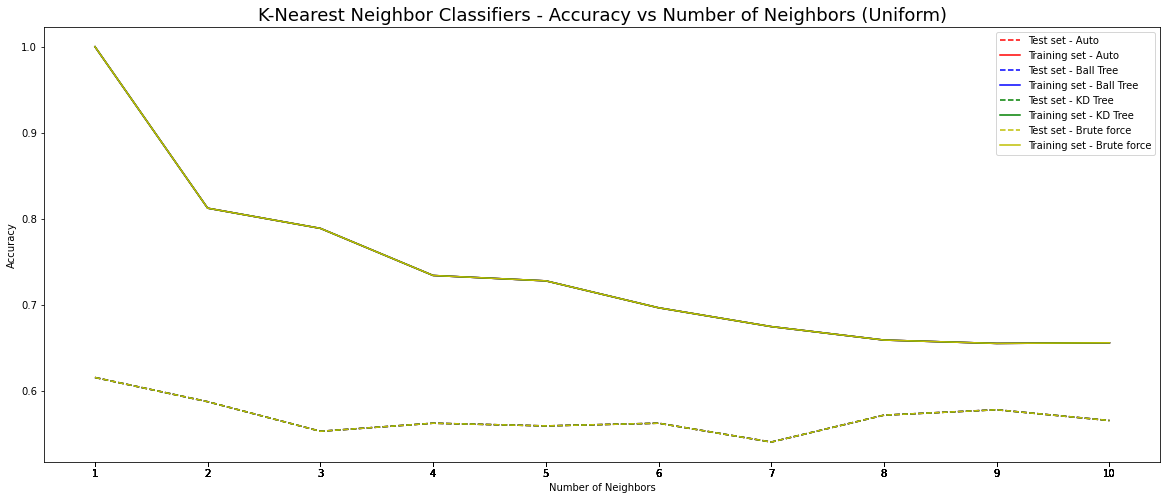

In [ ]:
df_knn_score1 = df_knn_score[(df_knn_score['Weights'].str.match('uniform'))&(df_knn_score['Algorithm'].str.match('auto'))]
df_knn_score2 = df_knn_score[(df_knn_score['Weights'].str.match('uniform'))&(df_knn_score['Algorithm'].str.match('ball_tree'))]
df_knn_score3 = df_knn_score[(df_knn_score['Weights'].str.match('uniform'))&(df_knn_score['Algorithm'].str.match('kd_tree'))]
df_knn_score4 = df_knn_score[(df_knn_score['Weights'].str.match('uniform'))&(df_knn_score['Algorithm'].str.match('brute'))]

plt.figure(figsize=[20, 8])
plt.plot(np.arange(1,11), df_knn_score1["Score Test"], "--r", label = "Test set - Auto")
plt.plot(np.arange(1,11), df_knn_score1["Score Training"], "-r", label = "Training set - Auto")

plt.plot(np.arange(1,11), df_knn_score2["Score Test"], "--b", label = "Test set - Ball Tree")
plt.plot(np.arange(1,11), df_knn_score2["Score Training"], "-b", label = "Training set - Ball Tree")

plt.plot(np.arange(1,11), df_knn_score3["Score Test"], "--g", label = "Test set - KD Tree")
plt.plot(np.arange(1,11), df_knn_score3["Score Training"], "-g", label = "Training set - KD Tree")

plt.plot(np.arange(1,11), df_knn_score4["Score Test"], "--y", label = "Test set - Brute force")
plt.plot(np.arange(1,11), df_knn_score4["Score Training"], "-y", label = "Training set - Brute force")

plt.legend(loc = "best")
plt.title("K-Nearest Neighbor Classifiers - Accuracy vs Number of Neighbors (Uniform)", fontsize = 18)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xticks(neighbors_list)
plt.show()

Although we see only the Brute force algorithm lines, the scores of training set and test set are the same indipendently the algorithm used.

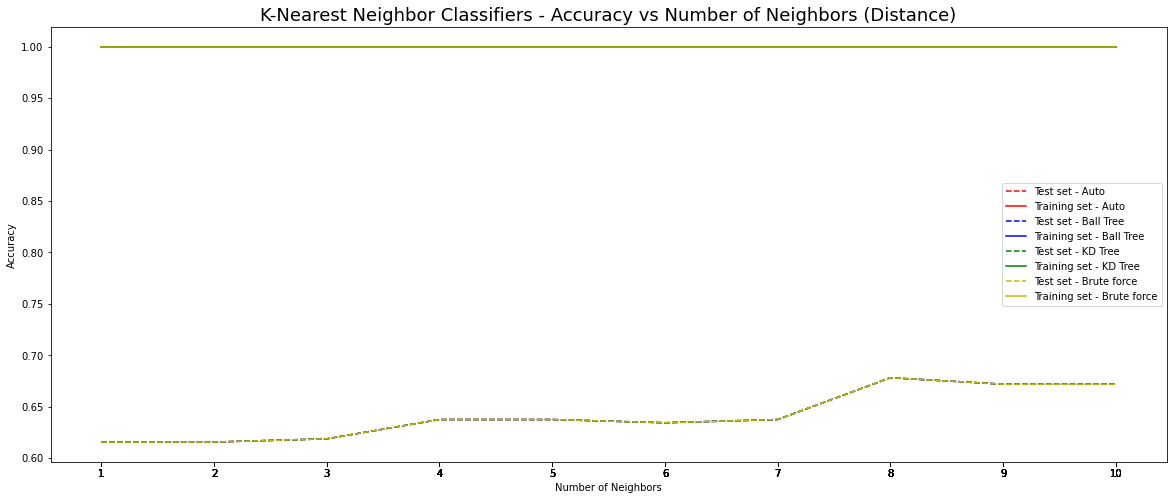

In [ ]:
df_knn_score5 = df_knn_score[(df_knn_score['Weights'].str.match('distance'))&(df_knn_score['Algorithm'].str.match('auto'))]
df_knn_score6 = df_knn_score[(df_knn_score['Weights'].str.match('distance'))&(df_knn_score['Algorithm'].str.match('ball_tree'))]
df_knn_score7 = df_knn_score[(df_knn_score['Weights'].str.match('distance'))&(df_knn_score['Algorithm'].str.match('kd_tree'))]
df_knn_score8 = df_knn_score[(df_knn_score['Weights'].str.match('distance'))&(df_knn_score['Algorithm'].str.match('brute'))]

plt.figure(figsize=[20, 8])
plt.plot(np.arange(1,11), df_knn_score5["Score Test"], "--r", label = "Test set - Auto")
plt.plot(np.arange(1,11), df_knn_score5["Score Training"], "-r", label = "Training set - Auto")

plt.plot(np.arange(1,11), df_knn_score6["Score Test"], "--b", label = "Test set - Ball Tree")
plt.plot(np.arange(1,11), df_knn_score6["Score Training"], "-b", label = "Training set - Ball Tree")

plt.plot(np.arange(1,11), df_knn_score6["Score Test"], "--g", label = "Test set - KD Tree")
plt.plot(np.arange(1,11), df_knn_score6["Score Training"], "-g", label = "Training set - KD Tree")

plt.plot(np.arange(1,11), df_knn_score6["Score Test"], "--y", label = "Test set - Brute force")
plt.plot(np.arange(1,11), df_knn_score6["Score Training"], "-y", label = "Training set - Brute force")

plt.legend(loc = "best")
plt.title("K-Nearest Neighbor Classifiers - Accuracy vs Number of Neighbors (Distance)", fontsize = 18)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xticks(neighbors_list)
plt.show()

The same happened here, using the Distance as weight, although we see only the Brute force algorithm lines the scores of training set and test set are the same indipendently the algorithm used.

##  3.7 Radius Neighbors
*Radius Neighbors Classifier implements learning based on the number of neighbors within a fixed radius r of
each training point, where r is a floating-point value specified by the user.*<br />
In this case we created many models varying the radius, weights and algorithms:

In [ ]:
radius_list = list()
weights_list = []
algorithm_list = []
rad_score_train = list()
rad_score_test = list()

for i in range(1,11):
    for weight in ['uniform', 'distance']:
        for algorithm in ['auto', 'ball_tree', 'kd_tree', 'brute']:
            rad = RadiusNeighborsClassifier(radius = i, weights = weight, algorithm = algorithm).fit(X_train, y_train)
            radius_list.append(i)
            weights_list.append(weight)
            algorithm_list.append(algorithm)
            rad_score_train.append(rad.score(X_train, y_train))
            rad_score_test.append(rad.score(X_test, y_test))


rad_score = { "Radius": radius_list, "Weights": weights_list, "Algorithm": algorithm_list, "Score Training": rad_score_train, "Score Test": rad_score_test}
df_rad_score = pd.DataFrame(rad_score)
df_rad_score.head()

,Radius,Weights,Algorithm,Score Training,Score Test
0,1,uniform,auto,0.432369,0.45
1,1,uniform,ball_tree,0.432369,0.45
2,1,uniform,kd_tree,0.432369,0.45
3,1,uniform,brute,0.432369,0.45
4,1,distance,auto,1.000000,0.65


And the best model is:

In [ ]:
df_rad_score.loc[[df_rad_score["Score Test"].idxmax()]]

,Radius,Weights,Algorithm,Score Training,Score Test
4,1,distance,auto,1.0,0.65


In [ ]:
rad_model_best = RadiusNeighborsClassifier(radius = 1, weights = 'distance').fit(X_train, y_train)

We can also plot the accuracy of models versus the radius used:

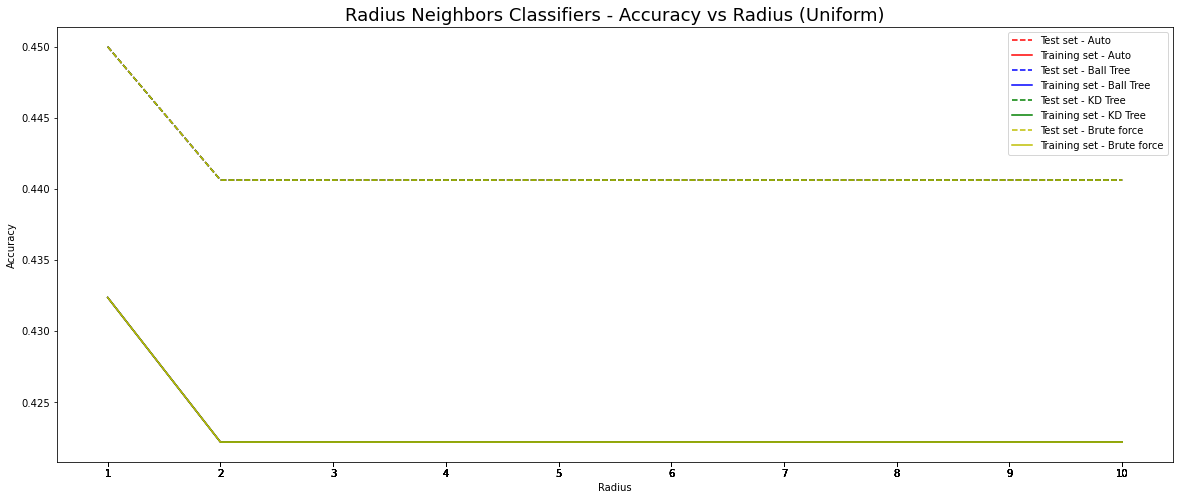

In [ ]:
df_rad_score1 = df_rad_score[(df_rad_score['Weights'].str.match('uniform'))&(df_rad_score['Algorithm'].str.match('auto'))]
df_rad_score2 = df_rad_score[(df_rad_score['Weights'].str.match('uniform'))&(df_rad_score['Algorithm'].str.match('ball_tree'))]
df_rad_score3 = df_rad_score[(df_rad_score['Weights'].str.match('uniform'))&(df_rad_score['Algorithm'].str.match('kd_tree'))]
df_rad_score4 = df_rad_score[(df_rad_score['Weights'].str.match('uniform'))&(df_rad_score['Algorithm'].str.match('brute'))]

plt.figure(figsize=[20, 8])
plt.plot(np.arange(1,11), df_rad_score1["Score Test"], "--r", label = "Test set - Auto")
plt.plot(np.arange(1,11), df_rad_score1["Score Training"], "-r", label = "Training set - Auto")

plt.plot(np.arange(1,11), df_rad_score2["Score Test"], "--b", label = "Test set - Ball Tree")
plt.plot(np.arange(1,11), df_rad_score2["Score Training"], "-b", label = "Training set - Ball Tree")

plt.plot(np.arange(1,11), df_rad_score3["Score Test"], "--g", label = "Test set - KD Tree")
plt.plot(np.arange(1,11), df_rad_score3["Score Training"], "-g", label = "Training set - KD Tree")

plt.plot(np.arange(1,11), df_rad_score4["Score Test"], "--y", label = "Test set - Brute force")
plt.plot(np.arange(1,11), df_rad_score4["Score Training"], "-y", label = "Training set - Brute force")

plt.legend(loc = "best")
plt.title("Radius Neighbors Classifiers - Accuracy vs Radius (Uniform)", fontsize = 18)
plt.xlabel("Radius")
plt.ylabel("Accuracy")
plt.xticks(radius_list)
plt.show()

Although we see only the Brute force algorithm lines, the scores of training set and test set are the same indipendently the algorithm used.

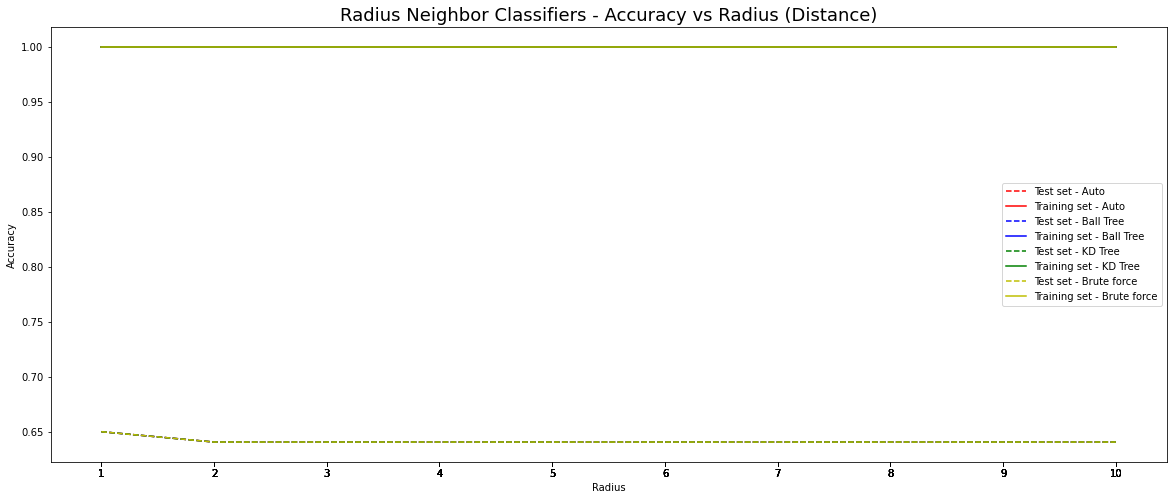

In [ ]:
df_rad_score5 = df_rad_score[(df_rad_score['Weights'].str.match('distance'))&(df_rad_score['Algorithm'].str.match('auto'))]
df_rad_score6 = df_rad_score[(df_rad_score['Weights'].str.match('distance'))&(df_rad_score['Algorithm'].str.match('ball_tree'))]
df_rad_score7 = df_rad_score[(df_rad_score['Weights'].str.match('distance'))&(df_rad_score['Algorithm'].str.match('kd_tree'))]
df_rad_score8 = df_rad_score[(df_rad_score['Weights'].str.match('distance'))&(df_rad_score['Algorithm'].str.match('brute'))]

plt.figure(figsize=[20, 8])
plt.plot(np.arange(1,11), df_rad_score5["Score Test"], "--r", label = "Test set - Auto")
plt.plot(np.arange(1,11), df_rad_score5["Score Training"], "-r", label = "Training set - Auto")

plt.plot(np.arange(1,11), df_rad_score6["Score Test"], "--b", label = "Test set - Ball Tree")
plt.plot(np.arange(1,11), df_rad_score6["Score Training"], "-b", label = "Training set - Ball Tree")

plt.plot(np.arange(1,11), df_rad_score6["Score Test"], "--g", label = "Test set - KD Tree")
plt.plot(np.arange(1,11), df_rad_score6["Score Training"], "-g", label = "Training set - KD Tree")

plt.plot(np.arange(1,11), df_rad_score6["Score Test"], "--y", label = "Test set - Brute force")
plt.plot(np.arange(1,11), df_rad_score6["Score Training"], "-y", label = "Training set - Brute force")

plt.legend(loc = "best")
plt.title("Radius Neighbor Classifiers - Accuracy vs Radius (Distance)", fontsize = 18)
plt.xlabel("Radius")
plt.ylabel("Accuracy")
plt.xticks(radius_list)
plt.show()

The same happend here, using the Distance as weight, although we see only the Brute force algorithm lines the scores of training set and test set are the same indipendently the algorithm used.

## 3.8 Support Vector Machine
SVMs are discriminative classification models that rather than modeling each class, they simply find a line or curve (in two dimensions) or a manifold (in multiple dimensions) that divides the classes from each other.

The linear models LinearSVC() and SVC (kernel='linear') yield slightly different decision boundaries.

This can be a consequence of the following differences:
* LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.

* LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

Both linear models have linear decision boundaries (intersecting hyperplanes) while the non-linear kernel models (polynomial or Gaussian RBF) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.

In [ ]:
svc_type = list()
svc_score_train = list()
svc_score_test = list()
kernel_list = []

# Computing LinearSVC
linsvc = LinearSVC(random_state = seed, multi_class = 'ovr').fit(X_train, y_train)
svc_score_train.append(linsvc.score(X_train, y_train))
svc_score_test.append(linsvc.score(X_test, y_test))
svc_type.append('LinearSVC')
kernel_list.append('None')

# Computing SVC with different kernels
for kernel in ['poly', 'rbf', 'sigmoid', 'linear']:
    svc = SVC(random_state = seed, kernel = kernel).fit(X_train, y_train)
    svc_type.append('SVC')
    kernel_list.append(kernel)
    svc_score_train.append(svc.score(X_train, y_train))
    svc_score_test.append(svc.score(X_test, y_test))
    
svc_score = { "Type": svc_type, "Kernel": kernel_list, "Score Training": svc_score_train, "Score Test": svc_score_test}
df_svc_score = pd.DataFrame(svc_score)
df_svc_score.head()

,Type,Kernel,Score Training,Score Test
0,LinearSVC,None,0.598905,0.556250
1,SVC,poly,0.667709,0.575000
2,SVC,rbf,0.648163,0.600000
3,SVC,sigmoid,0.474590,0.446875
4,SVC,linear,0.593432,0.565625


And the best model is:

In [ ]:
df_svc_score.loc[[df_svc_score["Score Test"].idxmax()]]

,Type,Kernel,Score Training,Score Test
2,SVC,rbf,0.648163,0.6


In [ ]:
svc_model_best = SVC(random_state = seed, kernel = 'rbf').fit(X_train, y_train)

## 3.9 Logistic Regression
*Logistic regression* is a statistical model that in its basic form uses a logistic function to model a binary dependent variable. Considering that we are analyzing a multiclass problem we need to use the 'ovr' method (one-vs-rest and uses the cross-entropy loss) and change C parameters (a value representing the inverse of regularization strength) and tolerance for stopping criteria between 0.5 and 1.

In [ ]:
c_list = list()
tol_list = []
lr_score_train = list()
lr_score_test = list()

for tolerance in [0.5, 1]:
    for c in [0.05, 0.25, 0.50, 0.75, 1]:
        lr = LogisticRegression(C = c, multi_class='ovr', tol = tolerance).fit(X_train, y_train)
        c_list.append(c)
        tol_list.append(tolerance)
        lr_score_train.append(lr.score(X_train, y_train))
        lr_score_test.append(lr.score(X_test, y_test))


lr_score = { "C": c_list, "Tolerance": tol_list, "Score Training": lr_score_train, "Score Test": lr_score_test}
df_lr_score = pd.DataFrame(lr_score)
df_lr_score.head()

,C,Tolerance,Score Training,Score Test
0,0.05,0.5,0.569977,0.54375
1,0.25,0.5,0.587959,0.54375
2,0.50,0.5,0.593432,0.55000
3,0.75,0.5,0.596560,0.55625
4,1.00,0.5,0.595778,0.55625


And the best model is:

In [ ]:
df_lr_score.loc[[df_lr_score["Score Test"].idxmax()]]

,C,Tolerance,Score Training,Score Test
3,0.75,0.5,0.59656,0.55625


In [ ]:
lr_model_best = LogisticRegression(C = 0.75, multi_class='ovr', tol = 0.5).fit(X_train, y_train)

We can also plot the accuracy of the models versus the C value of inverse of regularization strength:

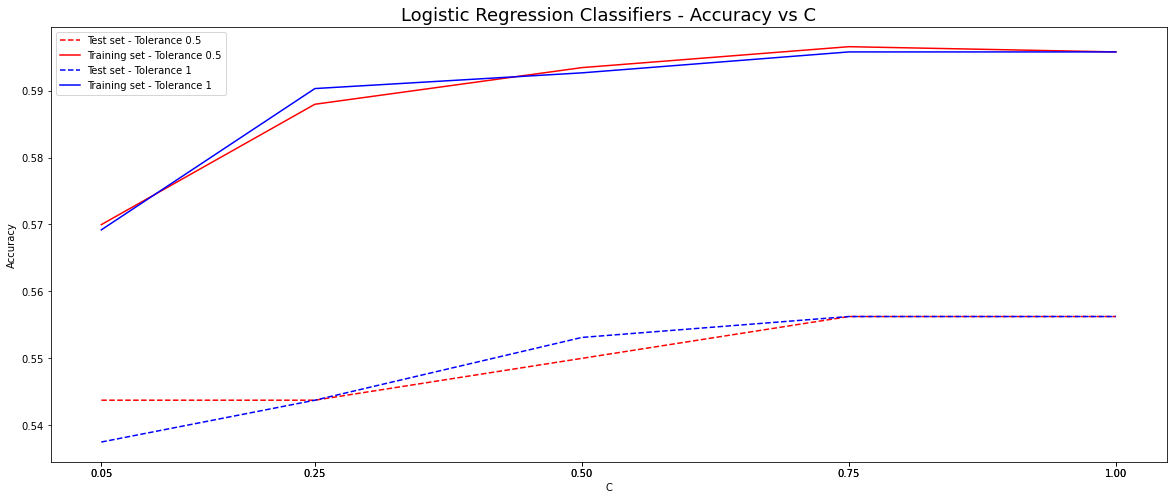

In [ ]:
df_lr_score1 = df_lr_score[(df_lr_score['Tolerance'] == 0.5)]
df_lr_score2 = df_lr_score[(df_lr_score['Tolerance'] == 1)]

plt.figure(figsize=[20, 8])
plt.plot([0.05, 0.25, 0.50, 0.75, 1], df_lr_score1["Score Test"], "--r", label = "Test set - Tolerance 0.5")
plt.plot([0.05, 0.25, 0.50, 0.75, 1], df_lr_score1["Score Training"], "-r", label = "Training set - Tolerance 0.5")

plt.plot([0.05, 0.25, 0.50, 0.75, 1], df_lr_score2["Score Test"], "--b", label = "Test set - Tolerance 1")
plt.plot([0.05, 0.25, 0.50, 0.75, 1], df_lr_score2["Score Training"], "-b", label = "Training set - Tolerance 1")

plt.legend(loc = "best")
plt.title("Logistic Regression Classifiers - Accuracy vs C", fontsize = 18)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.xticks(c_list)
plt.show()

## 3.10 Methods comparison
With this plot we try to identify the best classification method and the best model:

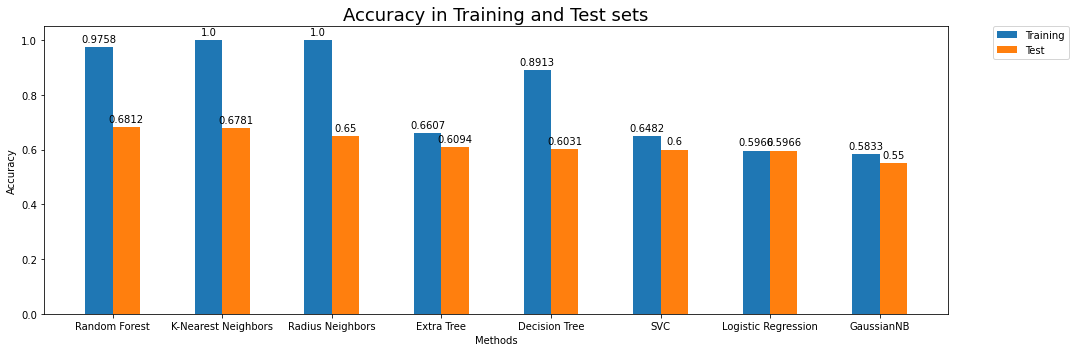

In [ ]:
accuracy_train_best = [round(rf_model_best.score(X_train, y_train),4), round(knn_model_best.score(X_train, y_train), 4), round(rad_model_best.score(X_train, y_train),4 ), round(et_model_best.score(X_train, y_train),4), round(dt_model_best.score(X_train, y_train),4), round(svc_model_best.score(X_train, y_train), 4), round(lr_model_best.score(X_train, y_train), 4), round(gnb3.score(X_train, y_train), 4)]
accuracy_test_best = [round(rf_model_best.score(X_test, y_test),4), round(knn_model_best.score(X_test, y_test), 4), round(rad_model_best.score(X_test, y_test), 4), round(et_model_best.score(X_test, y_test),4), round(dt_model_best.score(X_test, y_test),4), round(svc_model_best.score(X_test, y_test), 4), round(lr_model_best.score(X_train, y_train), 4), round(gnb3.score(X_test, y_test), 4)]
methods = ["Random Forest", "K-Nearest Neighbors", "Radius Neighbors", "Extra Tree", "Decision Tree",  "SVC", "Logistic Regression", "GaussianNB"]

x = np.arange(len(methods))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=[15, 5])
rects1 = ax.bar(x - width/2, accuracy_train_best, width, label='Training')
rects2 = ax.bar(x + width/2, accuracy_test_best, width, label='Test')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Accuracy")
ax.set_xlabel("Methods")
ax.set_title("Accuracy in Training and Test sets", fontsize = 18)
ax.set_xticks(x)
ax.set_xticklabels(methods)

ax.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad = 0.)
fig.tight_layout()
plt.show()

As we can see the best method is the Random Forest with an accuracy on the test set of 68.12%.

## 3.11 Confusion matrix
Until now we have used Accuracy as the only metric to evaluate the classification method, it is a number between 0 and 1 and measures how often the prediction is correct but it does not tell us in what way predictions are wrong, so it is considered as a rough measurement.

Precision (also called positive predictive value) tells us the percentage of our samples that were properly labeled *positive*, relative to all the samples labeled as *positive*.

Recall (also called sensitivity) tells us the percentage of positive samples that are correctly labeled.

f1 score is a combination of precision and recall (as harmonic mean) that allow us to evaluate the model when there are imbalanced classes (like in real-life classification problem).

### 3.11.1 On training set
And now we can compute the confusion matrix on training set and found that not only the accuracy is high (0.98 on weighted average) but also recall and precision (compared to the confusion matrix of the original authors):

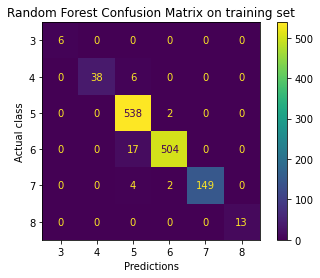

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      0.86      0.93        44
           5       0.95      1.00      0.97       540
           6       0.99      0.97      0.98       521
           7       1.00      0.96      0.98       155
           8       1.00      1.00      1.00        13

    accuracy                           0.98      1279
   macro avg       0.99      0.96      0.98      1279
weighted avg       0.98      0.98      0.98      1279



In [ ]:
plot_confusion_matrix(rf_model_best, X_train, y_train)
plt.title("Random Forest Confusion Matrix on training set")
plt.ylabel('Actual class') 
plt.xlabel('Predictions') 
plt.show()

print(metrics.classification_report(y_train, rf_model_best.predict(X_train), zero_division = 0))

<img src=" 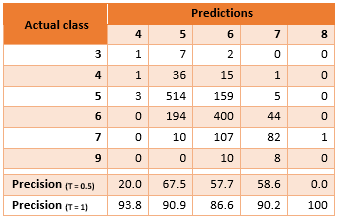"/>

### 3.11.2 On test set
In the confusion matrix for test set as we can see there are not wines with quality 3 and 4 and values are zeroes. Instead, in the model of the authors only wine with quality 3 has not been predicted correctly.
But if we take a look on wine of quality 5, 6, 7 and 8 our Random Forest model had a good result compared to the model with Tolerance of 0.5 of the authors.
Also Precision, recall and f1-score have a weighted average of 0.66 to 0.68.

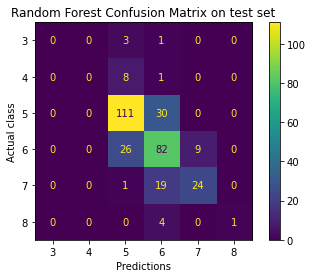

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         9
           5       0.74      0.79      0.77       141
           6       0.60      0.70      0.65       117
           7       0.73      0.55      0.62        44
           8       1.00      0.20      0.33         5

    accuracy                           0.68       320
   macro avg       0.51      0.37      0.39       320
weighted avg       0.66      0.68      0.66       320



In [ ]:
plot_confusion_matrix(rf_model_best, X_test, y_test)
plt.title("Random Forest Confusion Matrix on test set")
plt.ylabel('Actual class') 
plt.xlabel('Predictions')
plt.show()

print(metrics.classification_report(y_test, rf_model_best.predict(X_test), zero_division = 0))

<img src=" 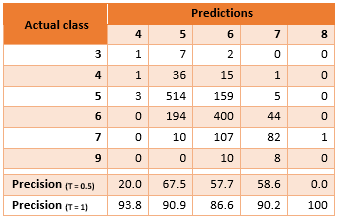"/>

# 4. Unsupervised learning
Unsupervised learning is a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels and with a minimum of human supervision.
Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters), in this chapter we will analize the whole dataset with K-Means (with Mini Batch), DBSCAN and Hierarchical Agglomerative Clustering.

## 4.1 K-Means
The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares.

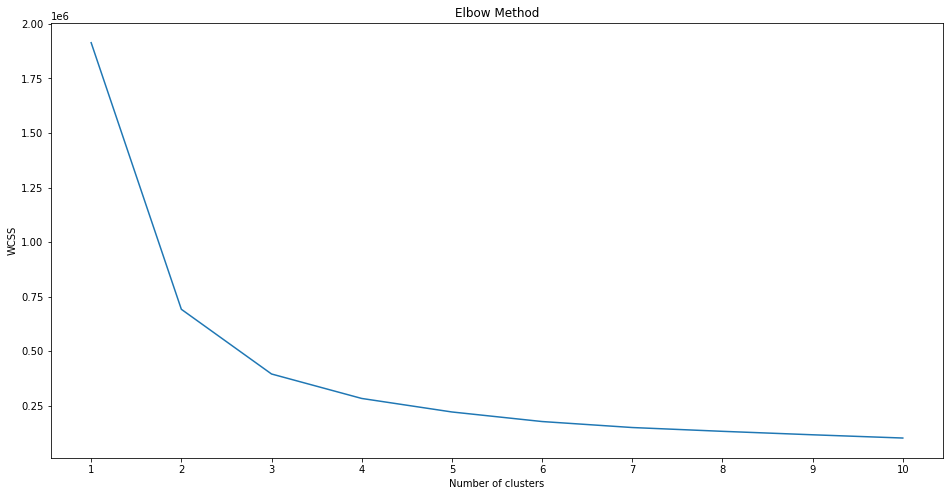

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state = seed).fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=[16, 8])
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, step=1))
plt.show()

Choosing the optimum number of clusters is no longer obvious, in this case using the WCSS and the Elbow method we found that three clusters should be a good number of clusters.

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = seed)
t0 = time.time()
clusters = kmeans.fit_predict(X)
t_batch = time.time() - t0
print("Time elapsed: ", t_batch)

y_pred_km = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    y_pred_km[mask] = mode(y[mask])[0]
    
accuracy_best_kmeans = accuracy_score(y, y_pred_km)
print("The accuracy score in K-Means is: ", accuracy_best_kmeans)

Time elapsed:  0.040158748626708984
The accuracy score in K-Means is:  0.4803001876172608


Computing again the model with three clusters we needed to match the labels predicted with K-Means with the true labels of the dataset and found that the accuracy of the model is 48.03% and the time for computation of the model is 0.040 seconds.

### 4.1.1 Mini Batch K-Means
Mini-batches are subsets of the input data, randomly sampled in each training iteration. In contrast to other algorithms that reduce the convergence time of k-means, mini-batch k-means produces results that are generally only slightly worse
than the standard algorithm but it is faster.

In [ ]:
mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=45, n_init=10, max_no_improvement=10, verbose=0, random_state = seed)
t0 = time.time()
clusters_mbk = mbk.fit_predict(X)
t_mini_batch = time.time() - t0
print("Time elapsed: ", t_mini_batch)

y_pred_mbk = np.zeros_like(clusters_mbk)
for i in range(10):
    mask = (clusters_mbk == i)
    y_pred_mbk[mask] = mode(y[mask])[0]

accuracy_best_mbk = accuracy_score(y, y_pred_mbk)
print("The accuracy score in Mini Batch K-Means is: ", accuracy_best_mbk)

Time elapsed:  0.020082950592041016
The accuracy score in Mini Batch K-Means is:  0.46841776110068795


As we can see the Mini Batch is relatively faster than K-Means, the model is computed in 0.020 seconds but the accuracy of the model is 46.84% which is lower than K-Means.

## 4.2 DBSCAN
DBSCAN is a density-based algorithm and use mainly two parameters:
* Density, the number of points within a specified radius $\epsilon$ (eps value);
* Minimum number of samples, the number of samples in a neighborhood for a point to be considered as a core point.

As we can see we used an eps value between 1 and 50, a minumum number of samples of 5 and then we computed the accuracy finding that there is a plateau beyond the eps value of 10.

In [ ]:
eps_list = list()
accuracy_dbscan_list = list()

for i in range(1, 51):
        clustering_dbscan = DBSCAN(eps=i, min_samples=5).fit_predict(X)
        eps_list.append(i)
        
        y_pred_dbscan = np.zeros_like(clustering_dbscan)
        for j in range(10):
            mask = (clustering_dbscan == j)
            y_pred_dbscan[mask] = mode(y[mask])[0]
        
        accuracy_dbscan_list.append(accuracy_score(y, y_pred_dbscan))
        
dbscan_score = { "EPS": eps_list, "Accuracy": accuracy_dbscan_list}
df_dbscan_score = pd.DataFrame(dbscan_score)
df_dbscan_score.head() 

,EPS,Accuracy
0,1,0.008130
1,2,0.188243
2,3,0.339587
3,4,0.386492
4,5,0.403377


And the best model is:

In [ ]:
df_dbscan_score.loc[[df_dbscan_score["Accuracy"].idxmax()]]

,EPS,Accuracy
16,17,0.425891


In [ ]:
best_dbscan_model = DBSCAN(eps=17, min_samples=5).fit_predict(X)

y_pred_dbscan = np.zeros_like(best_dbscan_model)
for i in range(10):
    mask = (best_dbscan_model == i)
    y_pred_dbscan[mask] = mode(y[mask])[0]

accuracy_best_dbscan = accuracy_score(y, y_pred_dbscan)

We can also plot the accuracy versus the EPS value:

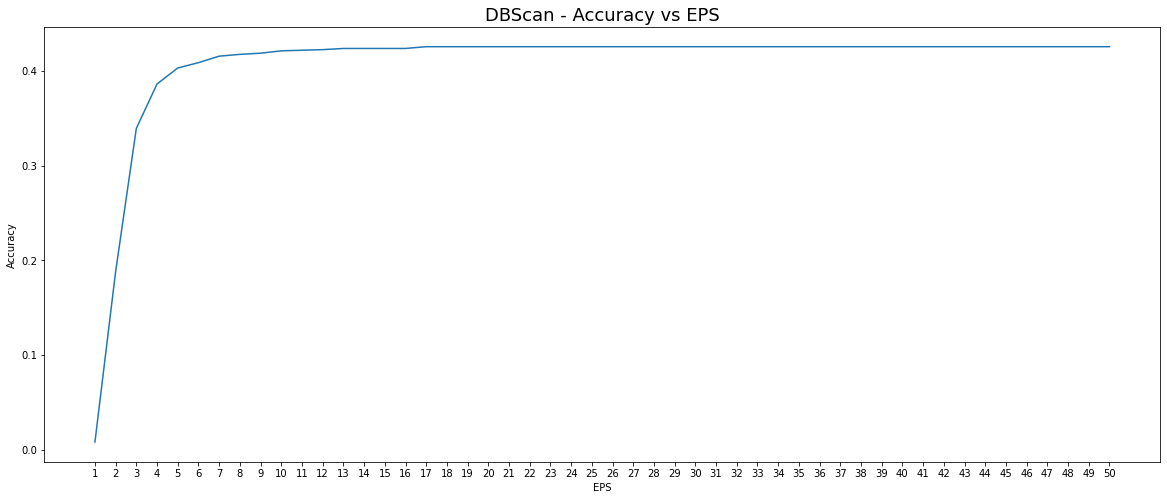

In [ ]:
plt.figure(figsize=[20, 8])
plt.plot(eps_list, df_dbscan_score["Accuracy"])
plt.title("DBScan - Accuracy vs EPS", fontsize = 18)
plt.xlabel("EPS")
plt.ylabel("Accuracy")
plt.xticks(eps_list)
plt.show()

## 4.3 Hierarchical Agglomerative Clustering
Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively.
The linkage criteria determines the metric used for the merge strategy:
* Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach;
* Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters;
* Average linkage minimizes the average of the distances between all observations of pairs of clusters;
* Single linkage minimizes the distance between the closest observations of pairs of clusters.

In [ ]:
n_clusters_list = list()
linkage_list = []
homogeinity_list = list()
completeness_list = list()
v_measure_list = list()
rand_list = list()
silhouette_list = list()


for i in range(2,11):
    for linkage in ['ward', 'complete', 'average', 'single']:
        clustering = AgglomerativeClustering(n_clusters = i, linkage = linkage).fit(X)
        n_clusters_list.append(i)
        linkage_list.append(linkage)
        homogeinity_list.append(homogeneity_score(y, clustering.labels_))
        completeness_list.append(completeness_score(y, clustering.labels_))
        v_measure_list.append(v_measure_score(y, clustering.labels_))
        rand_list.append(adjusted_rand_score(y, clustering.labels_))
        silhouette_list.append(silhouette_score(X, clustering.labels_))
        
hac_score = { "Number of clusters": n_clusters_list, "Linkage": linkage_list, "Homogeinity Score": homogeinity_list, "Completeness Score": completeness_list, "V-Measure Score": v_measure_list, "Rand Index": rand_list, "Silhouette Score": silhouette_list}
df_hac_score = pd.DataFrame(hac_score)
df_hac_score.head() 

,Number of clusters,Linkage,Homogeinity Score,Completeness Score,V-Measure Score,Rand Index,Silhouette Score
0,2,ward,0.026752,0.081488,0.040281,-0.009163,0.607519
1,2,complete,0.002205,0.271788,0.004374,0.001818,0.829480
2,2,average,0.002205,0.271788,0.004374,0.001818,0.829480
3,2,single,0.002205,0.271788,0.004374,0.001818,0.829480
4,3,ward,0.034640,0.041418,0.037727,0.008722,0.473985


With Hierarchical Clustering is very difficult tho choose a model, is possible to use some external criteria to identify the best model for homogeinity, completeness and v-measure. 
A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class, the score 1.0 stands for perfectly homogeneous labeling and the best one is:

In [ ]:
df_hac_score.loc[[df_hac_score["Homogeinity Score"].idxmax()]]

,Number of clusters,Linkage,Homogeinity Score,Completeness Score,V-Measure Score,Rand Index,Silhouette Score
32,10,ward,0.0591,0.035444,0.044312,0.000558,0.327962


A clustering result satisfies completeness if all the data points that are
members of a given class are elements of the same cluster, the score 1.0 stands for perfectly complete labeling and the best one is:

In [ ]:
df_hac_score.loc[[df_hac_score["Completeness Score"].idxmax()]]

,Number of clusters,Linkage,Homogeinity Score,Completeness Score,V-Measure Score,Rand Index,Silhouette Score
1,2,complete,0.002205,0.271788,0.004374,0.001818,0.82948


The V-measure is the harmonic mean between homogeneity and completeness and the best model is:

In [ ]:
df_hac_score.loc[[df_hac_score["V-Measure Score"].idxmax()]]

,Number of clusters,Linkage,Homogeinity Score,Completeness Score,V-Measure Score,Rand Index,Silhouette Score
34,10,average,0.048188,0.046199,0.047173,-0.004733,0.454085


Instead according to internal measure used to measure the goodness of a clustering structure without respect
to external information we have computed the Rand Index and the Silhouette score.

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings, as we can see all of the models has a Rand Index near zero or negative meaning random labeling.

Instead the Silhouette Coefficient combines cohesion and separation, the closer to 1 the better and the best model is:

In [ ]:
df_hac_score.loc[[df_hac_score["Silhouette Score"].idxmax()]]

,Number of clusters,Linkage,Homogeinity Score,Completeness Score,V-Measure Score,Rand Index,Silhouette Score
1,2,complete,0.002205,0.271788,0.004374,0.001818,0.82948


Computing again the model with two clusters with complate linkage have the best score for silhouette and completeness, we re-compute model and assign the correct class to the predicted labels and found that the accuracy of the model is 42.71%.

In [ ]:
best_hac_model = AgglomerativeClustering(n_clusters = 2, linkage = 'complete').fit_predict(X)

y_pred_hac = np.zeros_like(best_hac_model)
for i in range(10):
    mask = (best_hac_model == i)
    y_pred_hac[mask] = mode(y[mask])[0]

accuracy_best_hac = accuracy_score(y, y_pred_hac)
print("The accuracy score in HAC is: ", accuracy_best_hac)

The accuracy score in HAC is:  0.4271419637273296


## 4.4 Methods comparison
With this plot we try to identify the best classification method and the best model:

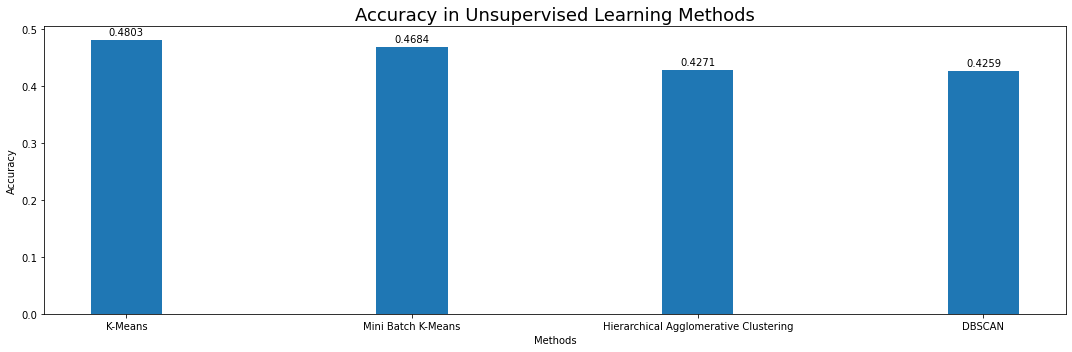

In [ ]:
accuracy_best_methods = [round(accuracy_best_kmeans,4), round(accuracy_best_mbk,4), round(accuracy_best_hac,4), round(accuracy_best_dbscan,4)]
methods = ["K-Means", "Mini Batch K-Means", "Hierarchical Agglomerative Clustering", "DBSCAN"]

x = np.arange(len(methods))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=[15, 5])
rects1 = ax.bar(x, accuracy_best_methods, width)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Accuracy")
ax.set_xlabel("Methods")
ax.set_title("Accuracy in Unsupervised Learning Methods", fontsize = 18)
ax.set_xticks(x)
ax.set_xticklabels(methods)

fig.tight_layout()
plt.show()

As we can see the best method is the K-Means with an accuracy of 48.03%

## 4.5 Confusion matrix

Considering the accuracy of the methods we decided to use the K-Means model due to a greater accuracy to compute the confusion matrix.

In the confusion matrix for the whole dataset as we can see there no prediction for wines with quality 3, 4, 7 and 8, meaning that the method has not predicted correctly the data. Also Precision, recall and f1-score have a weighted average of 0.48 and 0.40.

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        53
           5       0.73      0.26      0.38       681
           6       0.44      0.93      0.59       638
           7       0.00      0.00      0.00       199
           8       0.00      0.00      0.00        18

    accuracy                           0.48      1599
   macro avg       0.19      0.20      0.16      1599
weighted avg       0.48      0.48      0.40      1599



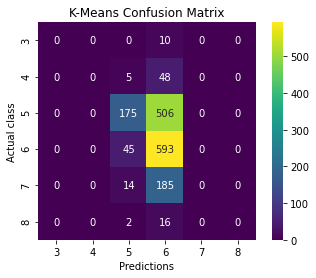

In [ ]:
mat = confusion_matrix(y_pred_km, y) #Pay attention that this confusion matrix is actually reversed
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar= True, cmap = 'viridis',
            xticklabels=range(3,9),
            yticklabels=range(3,9))
plt.ylabel('Actual class') #Pay attention that this confusion matrix is actually reversed and this is original x-axis
plt.xlabel('Predictions') #Pay attention that this confusion matrix is actually reversed and this is original y-axis
plt.title("K-Means Confusion Matrix")

print(metrics.classification_report(y, y_pred_km, zero_division = 0))

<img src=" 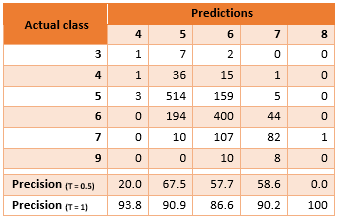"/>